# Data Analytics Project with Python

## Title: COVID 19 Healthy Diet Dataset

## Objective: Global Impact of Food habits and Health on COVID 19.

In [64]:
#Importing Libraries
import pandas as pd
import numpy as np
from IPython.display import * 
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format','{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import sklearn
from scipy import stats

### Reading the data set and Merging to for our Analysis Data set

In [65]:
Protein_Dataset = pd.read_html('https://github.com/kashu2303/COVID-19-Healthy-Diet-Dataset/blob/main/Protein_Supply_Quantity_Data.csv')[0]
Fat_Dataset = pd.read_html('https://github.com/kashu2303/COVID-19-Healthy-Diet-Dataset/blob/main/Fat_Supply_Quantity_Data.csv')[0]

Protein_Dataset.drop(columns='Unnamed: 0',inplace=True)
Fat_Dataset.drop(columns='Unnamed: 0',inplace=True)

In [66]:
Project_Dataset = pd.merge(Protein_Dataset,Fat_Dataset,
                           on=['Country'],
                           how='outer', 
                           suffixes=["_Protein", "_Fat"])

Project_Dataset.set_index('Country',inplace=True) #Dataset with Country as an Index
Project_Dataset.head()

,Alcoholic Beverages_Protein,Animal Products_Protein,Animal fats_Protein,"Aquatic Products, Other_Protein",Cereals - Excluding Beer_Protein,Eggs_Protein,"Fish, Seafood_Protein",Fruits - Excluding Wine_Protein,Meat_Protein,Milk - Excluding Butter_Protein,Offals_Protein,Oilcrops_Protein,Pulses_Protein,Spices_Protein,Starchy Roots_Protein,Stimulants_Protein,Sugar Crops_Protein,Sugar & Sweeteners_Protein,Treenuts_Protein,Vegetal Products_Protein,Vegetable Oils_Protein,Vegetables_Protein,Miscellaneous_Protein,Obesity_Protein,Undernourished_Protein,Confirmed_Protein,Deaths_Protein,Recovered_Protein,Active_Protein,Population_Protein,Unit (all except Population)_Protein,Alcoholic Beverages_Fat,Animal Products_Fat,Animal fats_Fat,"Aquatic Products, Other_Fat",Cereals - Excluding Beer_Fat,Eggs_Fat,"Fish, Seafood_Fat",Fruits - Excluding Wine_Fat,Meat_Fat,Miscellaneous_Fat,Milk - Excluding Butter_Fat,Offals_Fat,Oilcrops_Fat,Pulses_Fat,Spices_Fat,Starchy Roots_Fat,Stimulants_Fat,Sugar Crops_Fat,Sugar & Sweeteners_Fat,Treenuts_Fat,Vegetal Products_Fat,Vegetable Oils_Fat,Vegetables_Fat,Obesity_Fat,Undernourished_Fat,Confirmed_Fat,Deaths_Fat,Recovered_Fat,Active_Fat,Population_Fat,Unit (all except Population)_Fat
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00,9.75,0.03,0.00,35.98,0.41,0.06,0.58,3.13,5.53,0.59,0.20,1.25,0.17,0.19,0.55,0.00,0.00,0.14,40.25,0.00,1.14,0.05,4.50,29.8,0.14,0.01,0.12,0.01,38928000.00,%,0.00,21.64,6.22,0.00,8.04,0.69,0.03,0.42,6.12,0.02,8.28,0.31,1.05,0.20,0.28,0.05,0.10,0.00,0.00,0.75,28.37,17.08,0.36,4.50,29.8,0.14,0.01,0.12,0.01,38928000.00,%
Albania,0.18,27.75,0.07,0.00,14.23,1.81,0.63,1.28,7.66,16.48,1.11,0.37,1.46,0.00,0.89,0.26,0.00,0.00,0.27,22.26,0.01,3.25,0.05,22.30,6.2,2.97,0.05,1.79,1.12,2838000.00,%,0.00,32.00,3.42,0.00,2.67,1.64,0.14,0.64,8.74,0.02,17.76,0.29,3.16,0.11,0.00,0.05,0.53,0.00,0.00,0.92,18.00,9.24,0.65,22.30,6.2,2.97,0.05,1.79,1.12,2838000.00,%
Algeria,0.03,13.84,0.01,0.00,26.56,1.29,0.64,1.16,3.51,8.06,0.33,0.18,2.55,0.18,1.46,0.46,0.00,0.00,0.27,36.17,0.03,3.13,0.14,26.60,3.9,0.24,0.01,0.17,0.07,44357000.00,%,0.00,14.42,0.90,0.00,4.20,1.22,0.20,0.58,3.90,0.04,8.09,0.11,1.20,0.27,0.16,0.11,0.29,0.00,0.00,0.86,35.59,27.36,0.51,26.60,3.9,0.24,0.01,0.17,0.07,44357000.00,%
Angola,0.63,15.23,0.03,0.00,20.39,0.18,5.44,1.28,7.62,1.15,0.81,2.15,4.08,0.00,5.19,0.10,0.00,0.01,0.01,34.78,0.01,0.81,0.09,6.80,25,0.06,0.00,0.06,0.00,32522000.00,%,0.00,15.30,1.31,0.00,6.55,0.15,1.42,0.35,11.03,0.03,1.23,0.15,3.99,0.33,0.01,0.71,0.11,0.00,0.00,0.03,34.70,22.46,0.12,6.80,25,0.06,0.00,0.06,0.00,32522000.00,%
Antigua and Barbuda,0.15,33.19,0.13,0.00,10.51,0.48,8.21,1.26,16.07,7.43,0.85,0.77,0.88,0.34,0.47,0.41,0.00,0.00,0.07,16.82,0.04,1.60,0.29,19.10,NaN,0.29,0.01,0.19,0.10,98000.00,%,0.00,27.70,4.67,0.00,3.22,0.39,1.53,1.22,14.32,0.09,6.66,0.13,1.36,0.07,0.36,0.04,1.05,0.00,0.00,0.20,22.30,14.44,0.25,19.10,NaN,0.29,0.01,0.19,0.10,98000.00,%


### Dropping the duplicate columns

In [67]:
# Get list of duplicate columns
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(Project_Dataset.shape[1]):  
        
        # Select column at xth index.
        col = Project_Dataset.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        
        for y in range(x + 1, Project_Dataset.shape[1]):
            # Select column at yth index.
            otherCol = Project_Dataset.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(Project_Dataset.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = getDuplicateColumns(Project_Dataset)
#print('Duplicate Columns are as follows')
#for col in duplicateColumnNames:
#    print('Column name : ', col)

In [68]:
# Dropping duplicate and unwanted columns
Project_Dataset.drop(columns=getDuplicateColumns(Project_Dataset),inplace=True)
Project_Dataset.drop(columns=('Unit (all except Population)_Protein'),axis=1,inplace=True)

In [69]:
# Renaming Columns for readability
[Project_Dataset.rename(columns={l.split('_')[0] + '_Protein' : l.split('_')[0]}, 
                       inplace=True) for l in duplicateColumnNames ]

#[Project_Dataset_Country.rename(columns={l.split('_')[0] + '_Protein' : l.split('_')[0]}, 
#                      inplace=True) for l in duplicateColumnNames ]
Project_Dataset.head()

,Alcoholic Beverages_Protein,Animal Products_Protein,Animal fats_Protein,"Aquatic Products, Other_Protein",Cereals - Excluding Beer_Protein,Eggs_Protein,"Fish, Seafood_Protein",Fruits - Excluding Wine_Protein,Meat_Protein,Milk - Excluding Butter_Protein,Offals_Protein,Oilcrops_Protein,Pulses_Protein,Spices_Protein,Starchy Roots_Protein,Stimulants_Protein,Sugar Crops_Protein,Sugar & Sweeteners_Protein,Treenuts_Protein,Vegetal Products_Protein,Vegetable Oils_Protein,Vegetables_Protein,Miscellaneous_Protein,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Alcoholic Beverages_Fat,Animal Products_Fat,Animal fats_Fat,"Aquatic Products, Other_Fat",Cereals - Excluding Beer_Fat,Eggs_Fat,"Fish, Seafood_Fat",Fruits - Excluding Wine_Fat,Meat_Fat,Miscellaneous_Fat,Milk - Excluding Butter_Fat,Offals_Fat,Oilcrops_Fat,Pulses_Fat,Spices_Fat,Starchy Roots_Fat,Stimulants_Fat,Sugar Crops_Fat,Sugar & Sweeteners_Fat,Treenuts_Fat,Vegetal Products_Fat,Vegetable Oils_Fat,Vegetables_Fat
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00,9.75,0.03,0.00,35.98,0.41,0.06,0.58,3.13,5.53,0.59,0.20,1.25,0.17,0.19,0.55,0.00,0.00,0.14,40.25,0.00,1.14,0.05,4.50,29.8,0.14,0.01,0.12,0.01,38928000.00,0.00,21.64,6.22,0.00,8.04,0.69,0.03,0.42,6.12,0.02,8.28,0.31,1.05,0.20,0.28,0.05,0.10,0.00,0.00,0.75,28.37,17.08,0.36
Albania,0.18,27.75,0.07,0.00,14.23,1.81,0.63,1.28,7.66,16.48,1.11,0.37,1.46,0.00,0.89,0.26,0.00,0.00,0.27,22.26,0.01,3.25,0.05,22.30,6.2,2.97,0.05,1.79,1.12,2838000.00,0.00,32.00,3.42,0.00,2.67,1.64,0.14,0.64,8.74,0.02,17.76,0.29,3.16,0.11,0.00,0.05,0.53,0.00,0.00,0.92,18.00,9.24,0.65
Algeria,0.03,13.84,0.01,0.00,26.56,1.29,0.64,1.16,3.51,8.06,0.33,0.18,2.55,0.18,1.46,0.46,0.00,0.00,0.27,36.17,0.03,3.13,0.14,26.60,3.9,0.24,0.01,0.17,0.07,44357000.00,0.00,14.42,0.90,0.00,4.20,1.22,0.20,0.58,3.90,0.04,8.09,0.11,1.20,0.27,0.16,0.11,0.29,0.00,0.00,0.86,35.59,27.36,0.51
Angola,0.63,15.23,0.03,0.00,20.39,0.18,5.44,1.28,7.62,1.15,0.81,2.15,4.08,0.00,5.19,0.10,0.00,0.01,0.01,34.78,0.01,0.81,0.09,6.80,25,0.06,0.00,0.06,0.00,32522000.00,0.00,15.30,1.31,0.00,6.55,0.15,1.42,0.35,11.03,0.03,1.23,0.15,3.99,0.33,0.01,0.71,0.11,0.00,0.00,0.03,34.70,22.46,0.12
Antigua and Barbuda,0.15,33.19,0.13,0.00,10.51,0.48,8.21,1.26,16.07,7.43,0.85,0.77,0.88,0.34,0.47,0.41,0.00,0.00,0.07,16.82,0.04,1.60,0.29,19.10,NaN,0.29,0.01,0.19,0.10,98000.00,0.00,27.70,4.67,0.00,3.22,0.39,1.53,1.22,14.32,0.09,6.66,0.13,1.36,0.07,0.36,0.04,1.05,0.00,0.00,0.20,22.30,14.44,0.25


### Deleting Null values

In [70]:
Project_Dataset.dropna(subset = ['Deaths'],inplace=True)
Project_Dataset = Project_Dataset[Project_Dataset['Deaths'] != 0]

### Removing Unwanted Characters and Special Characters from Columns in our Dataset

In [71]:
import re
Project_Dataset.columns = [re.sub('[\s,-]+','_',col) for col in Project_Dataset.columns]
Project_Dataset['Undernourished'] = Project_Dataset['Undernourished'].map(lambda x: '2.5' if x == '<2.5' else x).astype('float64')
    
Project_Dataset.head()

,Alcoholic_Beverages_Protein,Animal_Products_Protein,Animal_fats_Protein,Aquatic_Products_Other_Protein,Cereals_Excluding_Beer_Protein,Eggs_Protein,Fish_Seafood_Protein,Fruits_Excluding_Wine_Protein,Meat_Protein,Milk_Excluding_Butter_Protein,Offals_Protein,Oilcrops_Protein,Pulses_Protein,Spices_Protein,Starchy_Roots_Protein,Stimulants_Protein,Sugar_Crops_Protein,Sugar_&_Sweeteners_Protein,Treenuts_Protein,Vegetal_Products_Protein,Vegetable_Oils_Protein,Vegetables_Protein,Miscellaneous_Protein,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Alcoholic_Beverages_Fat,Animal_Products_Fat,Animal_fats_Fat,Aquatic_Products_Other_Fat,Cereals_Excluding_Beer_Fat,Eggs_Fat,Fish_Seafood_Fat,Fruits_Excluding_Wine_Fat,Meat_Fat,Miscellaneous_Fat,Milk_Excluding_Butter_Fat,Offals_Fat,Oilcrops_Fat,Pulses_Fat,Spices_Fat,Starchy_Roots_Fat,Stimulants_Fat,Sugar_Crops_Fat,Sugar_&_Sweeteners_Fat,Treenuts_Fat,Vegetal_Products_Fat,Vegetable_Oils_Fat,Vegetables_Fat
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00,9.75,0.03,0.00,35.98,0.41,0.06,0.58,3.13,5.53,0.59,0.20,1.25,0.17,0.19,0.55,0.00,0.00,0.14,40.25,0.00,1.14,0.05,4.50,29.80,0.14,0.01,0.12,0.01,38928000.00,0.00,21.64,6.22,0.00,8.04,0.69,0.03,0.42,6.12,0.02,8.28,0.31,1.05,0.20,0.28,0.05,0.10,0.00,0.00,0.75,28.37,17.08,0.36
Albania,0.18,27.75,0.07,0.00,14.23,1.81,0.63,1.28,7.66,16.48,1.11,0.37,1.46,0.00,0.89,0.26,0.00,0.00,0.27,22.26,0.01,3.25,0.05,22.30,6.20,2.97,0.05,1.79,1.12,2838000.00,0.00,32.00,3.42,0.00,2.67,1.64,0.14,0.64,8.74,0.02,17.76,0.29,3.16,0.11,0.00,0.05,0.53,0.00,0.00,0.92,18.00,9.24,0.65
Algeria,0.03,13.84,0.01,0.00,26.56,1.29,0.64,1.16,3.51,8.06,0.33,0.18,2.55,0.18,1.46,0.46,0.00,0.00,0.27,36.17,0.03,3.13,0.14,26.60,3.90,0.24,0.01,0.17,0.07,44357000.00,0.00,14.42,0.90,0.00,4.20,1.22,0.20,0.58,3.90,0.04,8.09,0.11,1.20,0.27,0.16,0.11,0.29,0.00,0.00,0.86,35.59,27.36,0.51
Angola,0.63,15.23,0.03,0.00,20.39,0.18,5.44,1.28,7.62,1.15,0.81,2.15,4.08,0.00,5.19,0.10,0.00,0.01,0.01,34.78,0.01,0.81,0.09,6.80,25.00,0.06,0.00,0.06,0.00,32522000.00,0.00,15.30,1.31,0.00,6.55,0.15,1.42,0.35,11.03,0.03,1.23,0.15,3.99,0.33,0.01,0.71,0.11,0.00,0.00,0.03,34.70,22.46,0.12
Antigua and Barbuda,0.15,33.19,0.13,0.00,10.51,0.48,8.21,1.26,16.07,7.43,0.85,0.77,0.88,0.34,0.47,0.41,0.00,0.00,0.07,16.82,0.04,1.60,0.29,19.10,NaN,0.29,0.01,0.19,0.10,98000.00,0.00,27.70,4.67,0.00,3.22,0.39,1.53,1.22,14.32,0.09,6.66,0.13,1.36,0.07,0.36,0.04,1.05,0.00,0.00,0.20,22.30,14.44,0.25


In [72]:
#Ready Dataset
Project_Dataset.shape

(156, 53)

In [73]:
##DataTypes
Project_Dataset.dtypes

Alcoholic_Beverages_Protein       float64
Animal_Products_Protein           float64
Animal_fats_Protein               float64
Aquatic_Products_Other_Protein    float64
Cereals_Excluding_Beer_Protein    float64
Eggs_Protein                      float64
Fish_Seafood_Protein              float64
Fruits_Excluding_Wine_Protein     float64
Meat_Protein                      float64
Milk_Excluding_Butter_Protein     float64
Offals_Protein                    float64
Oilcrops_Protein                  float64
Pulses_Protein                    float64
Spices_Protein                    float64
Starchy_Roots_Protein             float64
Stimulants_Protein                float64
Sugar_Crops_Protein               float64
Sugar_&_Sweeteners_Protein        float64
Treenuts_Protein                  float64
Vegetal_Products_Protein          float64
Vegetable_Oils_Protein            float64
Vegetables_Protein                float64
Miscellaneous_Protein             float64
Obesity                           

### Mapping Continents with Countries using Python Inbulit Library

In [74]:
# Updating few Country Names in Dataset
Project_Dataset_Country = Project_Dataset.reset_index()
Project_Dataset_Country.Country.replace({"Cote d'Ivoire":"Côte d'Ivoire","Iran (Islamic Republic of)":"Iran, Islamic Republic of","Korea, North":"Korea, Republic of",
                                "Korea, South":"Korea, Democratic People's Republic of","Taiwan*":"Taiwan, Province of China","Venezuela (Bolivarian Republic of)":
                                         "Venezuela, Bolivarian Republic of"},inplace=True)

In [75]:
# Mapping Continents to Countires in our Dataset
# pip install pycountry_convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
countries = Project_Dataset_Country.Country

# Adding new columns to the Dataset
Project_Dataset_Country['Continents'] = [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]
#Project_Dataset.head()

### Using Pivot Table to show Continent Wise COVID 19 Death Numbers

In [76]:
Project_Dataset_Country['Death_Cases'] = Project_Dataset_Country['Deaths']*Project_Dataset_Country['Population']/100

Continent_Mortality = Project_Dataset_Country.pivot_table(index='Continents',values = ['Death_Cases'],aggfunc=np.sum)
Continent_Mortality

,Death_Cases
Continents,
Africa,92389.00
Asia,372787.00
Australia,936.00
Europe,733686.00
North America,672489.00
South America,426278.00


# Pie Chart showing Continent Wise COVID 19 Deaths

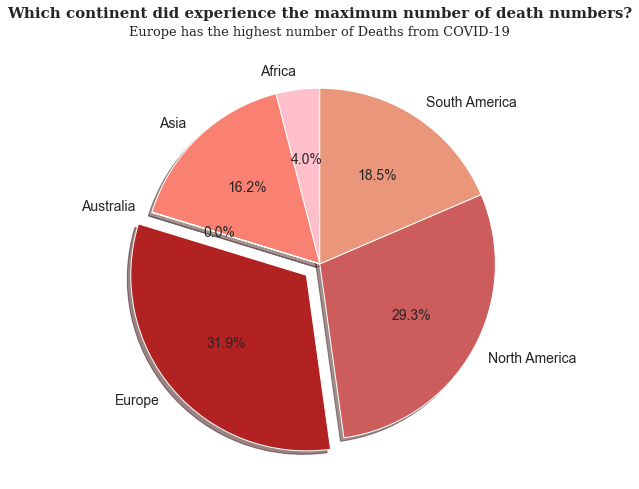

In [77]:
from pylab import *

fig=plt.figure(figsize=(15,7),facecolor='white')
gs=fig.add_gridspec(1,2)

ax0=fig.add_subplot(gs[0,0])

colormap1=['pink','salmon','mistyrose','firebrick','indianred','darksalmon']

ax0.text(-0,1.4,"Which continent did experience the maximum number of death numbers?",fontsize=15,fontweight='bold', fontfamily='serif',ha='center')
ax0.text(-0,1.3,"Europe has the highest number of Deaths from COVID-19",fontsize=13,fontweight='normal', fontfamily='serif',ha='center')

ax0.pie(Continent_Mortality['Death_Cases'], explode=[0,0,0,0.1,0,0],labels=Continent_Mortality.index, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap1,textprops={'fontsize': 14})

ax0.axis('equal')
plt.tight_layout()
plt.show()

## Bar Chart showing Top 20 countires with highest number of Deaths

In [78]:
Top_20_Deaths = Project_Dataset_Country.sort_values(by='Death_Cases',ascending=False).head(20)

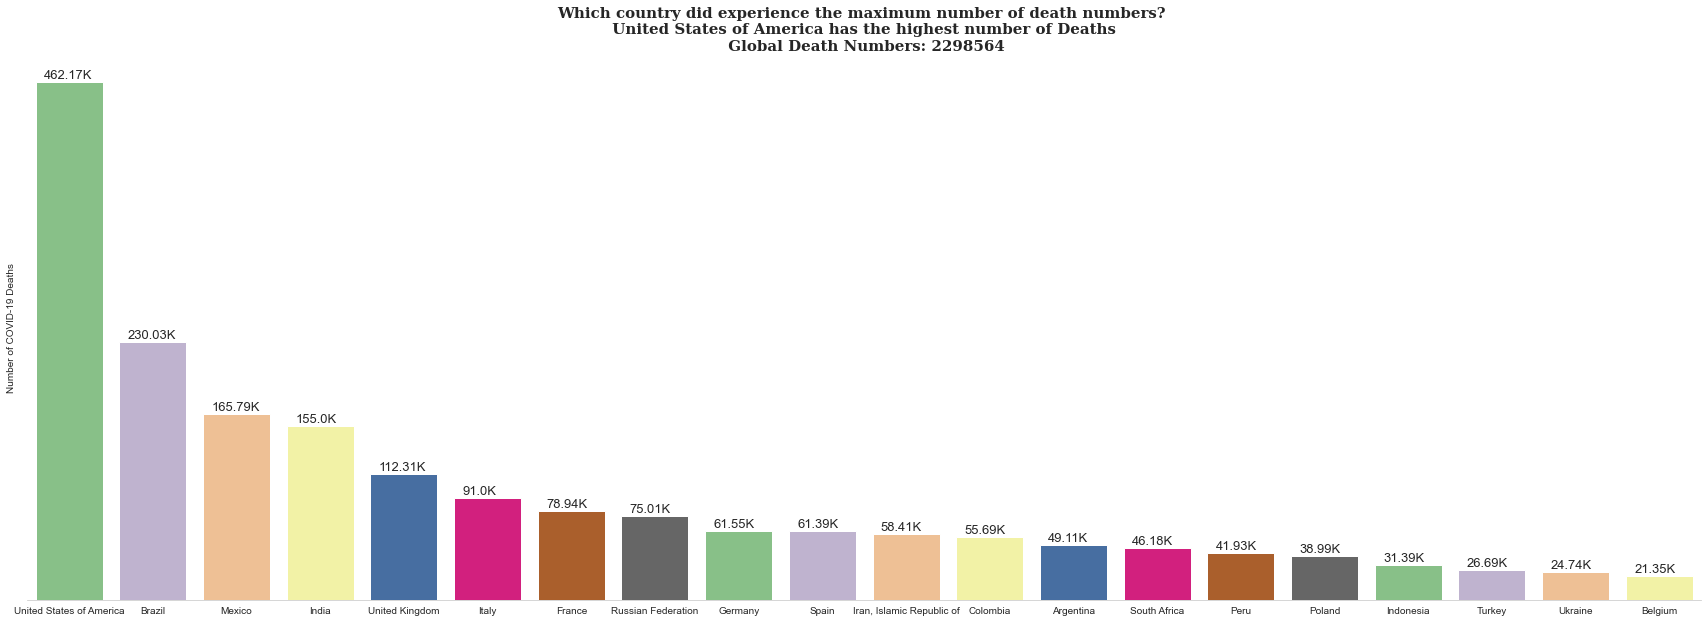

In [79]:
fig, ax = plt.subplots(1,1, figsize=(30,10))

graph = sns.barplot(data = Top_20_Deaths
            ,x = 'Country'
            ,y = 'Death_Cases'
            ,ax=ax, palette='Accent')
p = Project_Dataset_Country['Death_Cases'].sum()

sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine(left=True)
ax.set_yticklabels([])
plt.ylabel('Number of COVID-19 Deaths')
graph.set(xlabel=None)
plt.title('Which country did experience the maximum number of death numbers? \n United States of America has the highest number of Deaths \n Global Death Numbers: ' + str(int(p)) 
          ,fontsize=15,fontweight='bold', fontfamily='serif',ha='center')


#Optional
for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    #print(x)
    val = float(Project_Dataset_Country.Death_Cases[Project_Dataset_Country.Country==x].tolist()[0])/10**3
    plt.text(i-0.3, 3000+val*10**3, str(round(val,2))+'K', fontsize=13, rotation=0)
    


# Obesity Vs Death

In [80]:
#Using Binning snd Cutting
Obesity_Deaths=Project_Dataset[['Obesity','Deaths']]

bins=[0,10,20,50]
Obesity_Deaths['Obesity_level']=pd.cut(Obesity_Deaths.Obesity,bins=bins,labels=['Low_Obesity%','Moderate_Obesity%','High_Obesity%'])
Obesity_Deaths.drop(columns=['Obesity'],axis=1,inplace=True)
Obesity_Deaths.head()

,Deaths,Obesity_level
Country,,
Afghanistan,0.01,Low_Obesity%
Albania,0.05,High_Obesity%
Algeria,0.01,High_Obesity%
Angola,0.00,Low_Obesity%
Antigua and Barbuda,0.01,Moderate_Obesity%


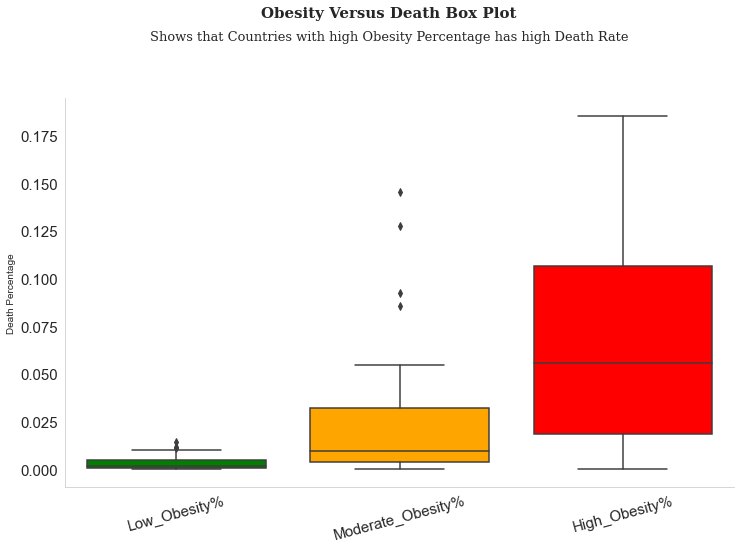

In [81]:
# Plotting the Box plot for Obesity Levels against Death Percentage
fig, ax = plt.subplots(1,1,figsize=(12,8))

tips = sns.load_dataset("tips")

graph = sns.boxplot(x='Obesity_level',
                    y='Deaths', 
                    data=Obesity_Deaths, 
                    #hue='Obesity_level',
                    #hue_order=['Low_Obesity%','Moderate_Obesity%','High_Obesity%'],
                    dodge=False
)
sns.set_style("whitegrid", {'axes.grid' : False})

mybox2 = ax.artists[2]
mybox1 = ax.artists[1]
mybox0 = ax.artists[0]

mybox0.set_facecolor('green')
mybox1.set_facecolor('orange')
mybox2.set_facecolor('red')

plt.text(x=0.5, y=0.94, s="Obesity Versus Death Box Plot", fontsize=15, ha="center", transform=fig.transFigure,fontweight='bold', fontfamily='serif')
plt.text(x=0.5, y=0.90, s= "Shows that Countries with high Obesity Percentage has high Death Rate", fontsize=13, ha="center", transform=fig.transFigure,
        fontweight='normal', fontfamily='serif')
plt.subplots_adjust(top=0.8, wspace=0.3)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=15)
graph.set(xlabel=None)
graph.set(ylabel='Death Percentage')

sns.despine()

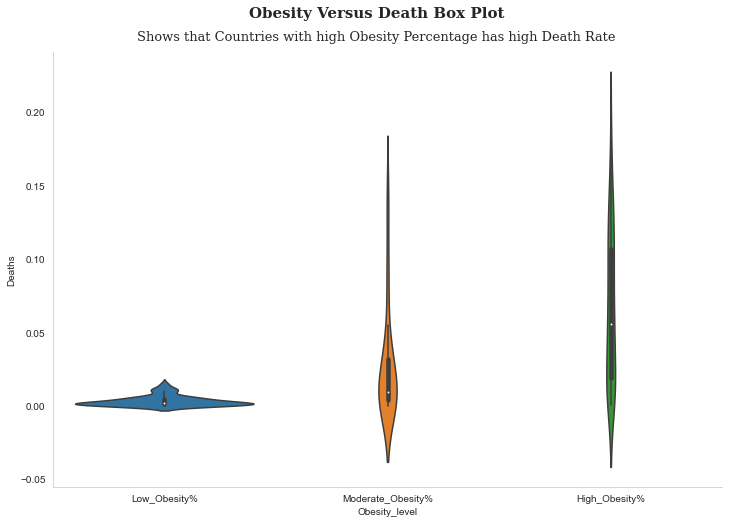

In [82]:
# violin plot as per Presentation's feedback
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.violinplot(x="Obesity_level", y="Deaths", data=Obesity_Deaths)

plt.text(x=0.5, y=0.94, s="Obesity Versus Death Box Plot", fontsize=15, ha="center", transform=fig.transFigure,fontweight='bold', fontfamily='serif')
plt.text(x=0.5, y=0.90, s= "Shows that Countries with high Obesity Percentage has high Death Rate", fontsize=13, ha="center", transform=fig.transFigure,
        fontweight='normal', fontfamily='serif')

sns.despine()

# Undernourished VS Death

In [83]:
#Using Binning snd Cutting
Undernourished_Deaths = Project_Dataset[['Undernourished','Deaths']]

bins=[0,2.5,10,20,60]
Undernourished_Deaths['Undernourished_Lvl']=pd.cut(Undernourished_Deaths.Undernourished,
                                   bins=bins,labels=['Undernourished%<2.5',
                                                     'B/W 2.5% &10%','B/W 10% & 20%',
                                                     'B/W 20% & 60%'])
Undernourished_Deaths.drop(columns=['Undernourished'],axis=1,inplace=True)
Undernourished_Deaths.head()

,Deaths,Undernourished_Lvl
Country,,
Afghanistan,0.01,B/W 20% & 60%
Albania,0.05,B/W 2.5% &10%
Algeria,0.01,B/W 2.5% &10%
Angola,0.00,B/W 20% & 60%
Antigua and Barbuda,0.01,NaN


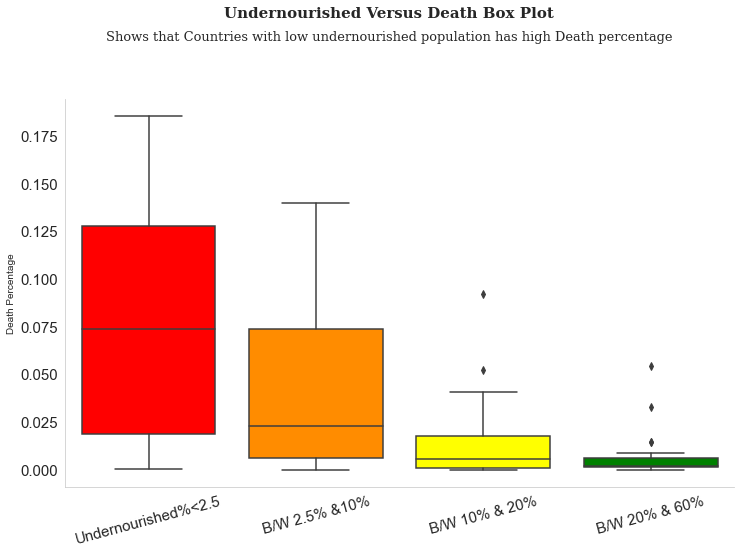

In [84]:
# Plotting the Box plot for Undernoruishment Levels against Death Percentage
fig, ax = plt.subplots(1,1,figsize=(12,8))
tips = sns.load_dataset("tips")

graph = sns.boxplot(x='Undernourished_Lvl', 
                    y='Deaths', 
                    data=Undernourished_Deaths, 
                    #hue='Undernourished_Lvl',
                    #hue_order=['Undernourished%<2.5', 'B/W 2.5% &10','B/W10%&20%','B/W 20% & 60%'], 
                    dodge=False # This is needed to center the boxplot 
                   )
sns.set_style("whitegrid", {'axes.grid' : False})

mybox3 = ax.artists[3]
mybox2 = ax.artists[2]
mybox1 = ax.artists[1]
mybox0 = ax.artists[0]

# Change the appearance of that box
mybox3.set_facecolor('green')
mybox2.set_facecolor('yellow')
mybox1.set_facecolor('darkorange')
mybox0.set_facecolor('red')

plt.text(x=0.5, y=0.94, s="Undernourished Versus Death Box Plot", fontsize=15, ha="center", transform=fig.transFigure,fontweight='bold', fontfamily='serif')
plt.text(x=0.5, y=0.90, s= "Shows that Countries with low undernourished population has high Death percentage", fontsize=13, ha="center", transform=fig.transFigure,
        fontweight='normal', fontfamily='serif')
plt.subplots_adjust(top=0.8, wspace=0.3)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=15)
graph.set(xlabel=None)
graph.set(ylabel='Death Percentage')

sns.despine()

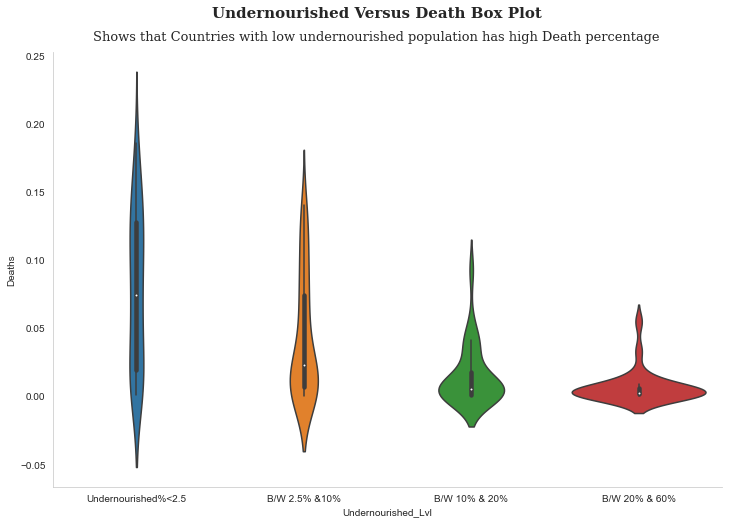

In [85]:
# violin plot as per Presentation's feedback
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.violinplot(x="Undernourished_Lvl", y="Deaths", data=Undernourished_Deaths)

plt.text(x=0.5, y=0.94, s="Undernourished Versus Death Box Plot", fontsize=15, ha="center", transform=fig.transFigure,fontweight='bold', fontfamily='serif')
plt.text(x=0.5, y=0.90, s= "Shows that Countries with low undernourished population has high Death percentage", fontsize=13, ha="center", transform=fig.transFigure,
        fontweight='normal', fontfamily='serif')
sns.despine()

# Correlation of Protein from different type of foods vs Death Percentage

In [86]:
Protein = Project_Dataset.filter(regex='_Protein$',axis=1)
Protein ['Deaths'] = Project_Dataset.Deaths

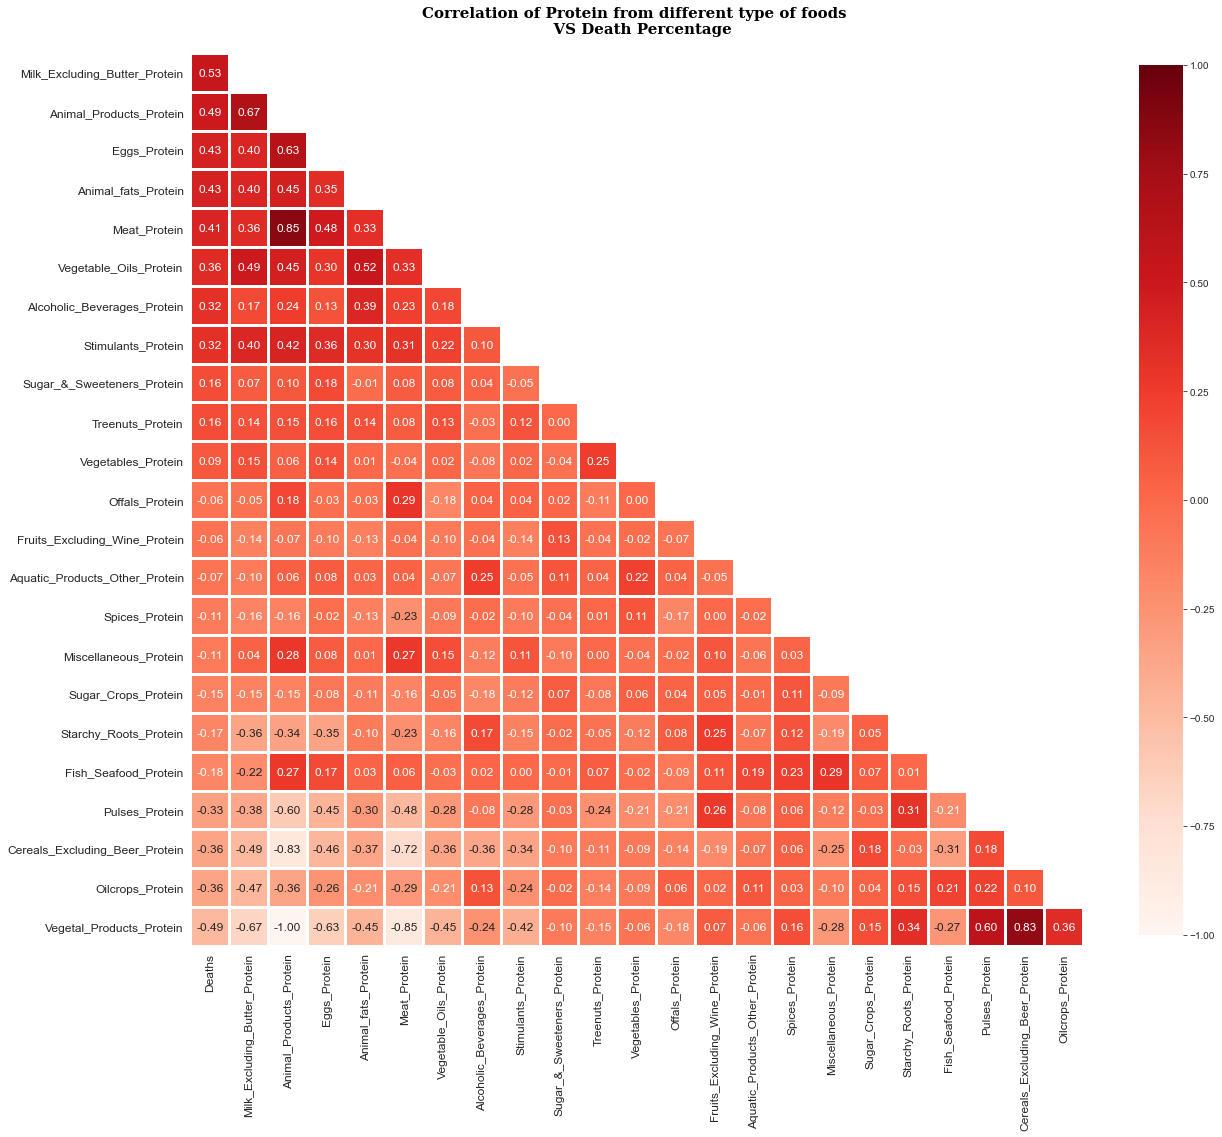

In [87]:
Protein[abs(Protein.corr()['Deaths']).sort_values(ascending=False).index].corr()

# Using Heat Map to show the correlation using .corr() function
fig, ax = plt.subplots(1,1, figsize=(20, 20))
#sns.set(False)
mask = np.triu(np.ones_like(Protein[Protein.corr()['Deaths'].sort_values(ascending=False).index].corr(), dtype=np.bool))
mask = mask[1:, :-1]
corr = Protein[Protein.corr()['Deaths'].sort_values(ascending=False).index].corr().iloc[1:,:-1]

sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 12},fmt=".2f", cmap='Reds',linewidths = 2, square= True,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.title("Correlation of Protein from different type of foods \n  VS Death Percentage",  fontdict={'color':'black', 'size':15, 'family':'serif','weight': 'bold'}, pad=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Correlation of Fats from different type of foods vs Death Percentage

In [88]:
Fat = Project_Dataset.filter(regex='_Fat$',axis=1)
Fat ['Deaths'] = Project_Dataset.Deaths

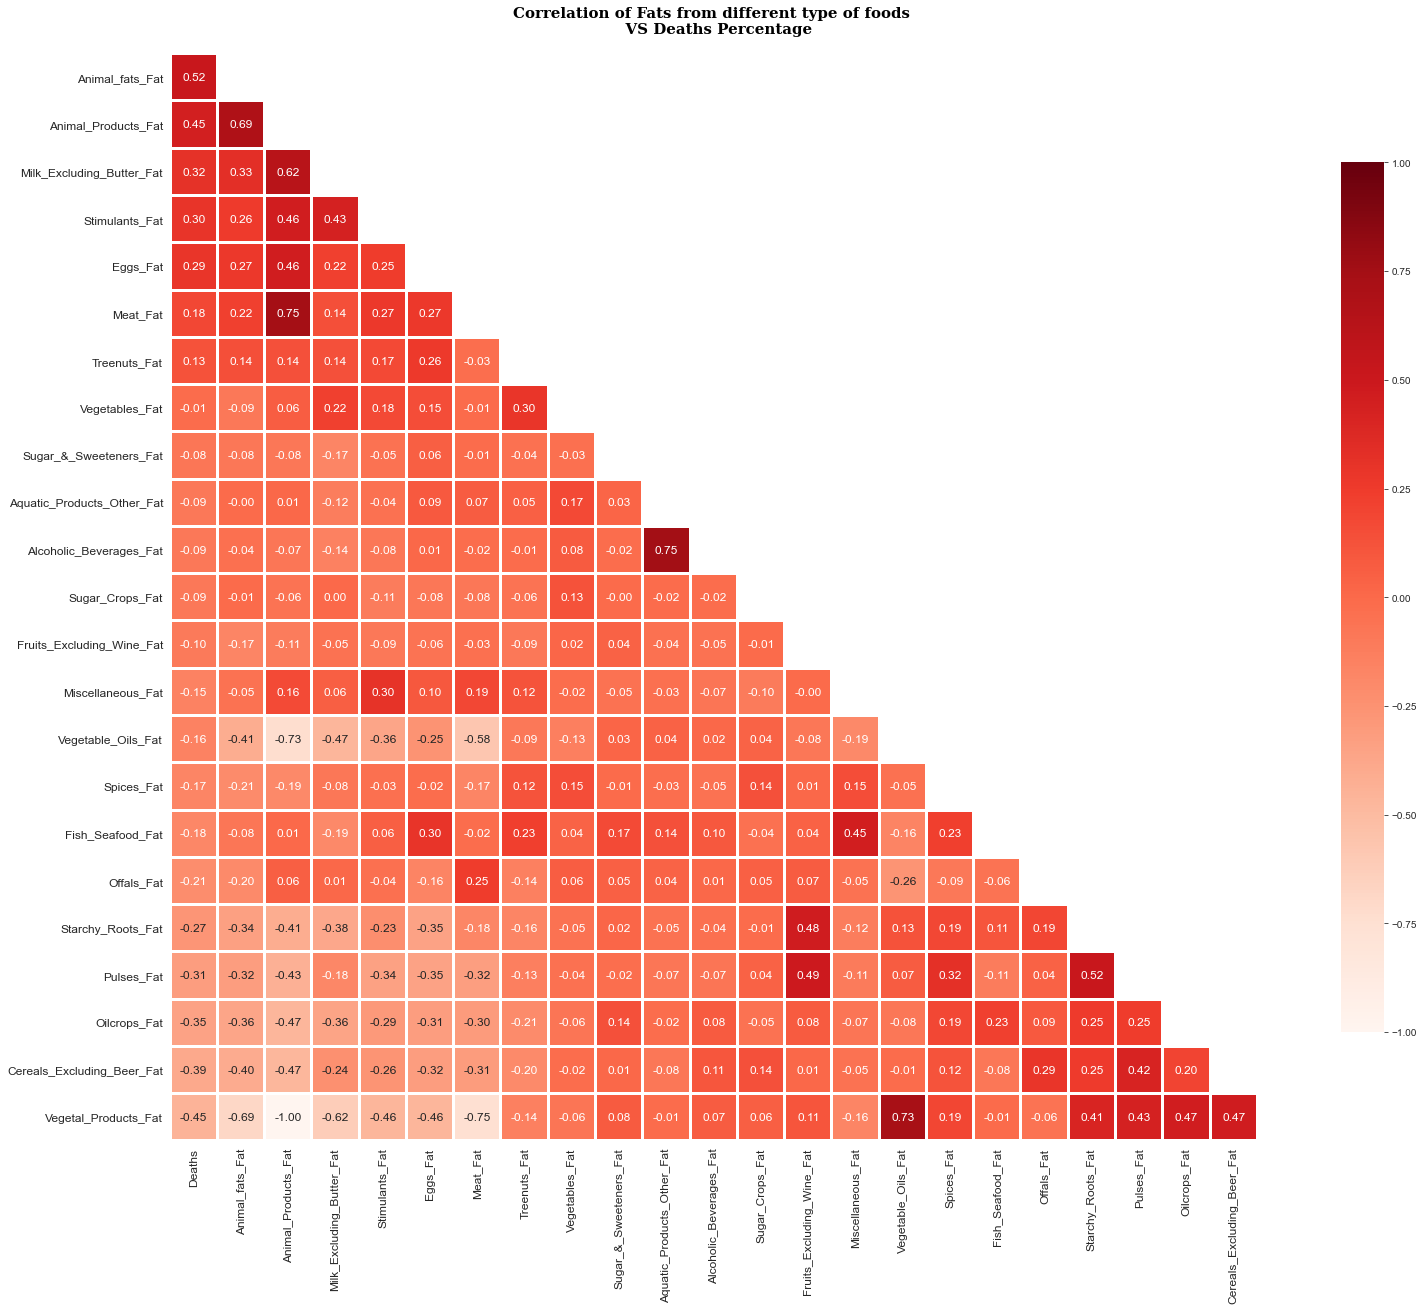

In [89]:
Fat[abs(Fat.corr()['Deaths']).sort_values(ascending=False).index].corr()

# Using Heat Map to show the correlation using .corr() function
fig, ax = plt.subplots(1,1, figsize=(30, 20))
#sns.set()
mask = np.triu(np.ones_like(Fat[Fat.corr()['Deaths'].sort_values(ascending=False).index].corr(), dtype=np.bool))
mask = mask[1:, :-1]
corr = Fat[Fat.corr()['Deaths'].sort_values(ascending=False).index].corr().iloc[1:,:-1]

sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 12},fmt=".2f", cmap='Reds',linewidths = 2, square= True,
            vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 18},fmt=".2f", cmap='Reds',linewidths = 2, square= True,
#             vmin=-1, vmax=1)

#ax = sns.heatmap(corr, cbar_kws={'label': '%'})
#ax.figure.axes[-1].yaxis.label.set_size(20)

plt.title("Correlation of Fats from different type of foods \n  VS Deaths Percentage",  fontdict={'color':'black', 'size':15, 'family':'serif','weight': 'bold'}, pad=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Comparison of Correlation of Types of foods (Fat and Protein) vs Death Percentage

Text(1014.320909090909, 0.5, 'Type of Foods')

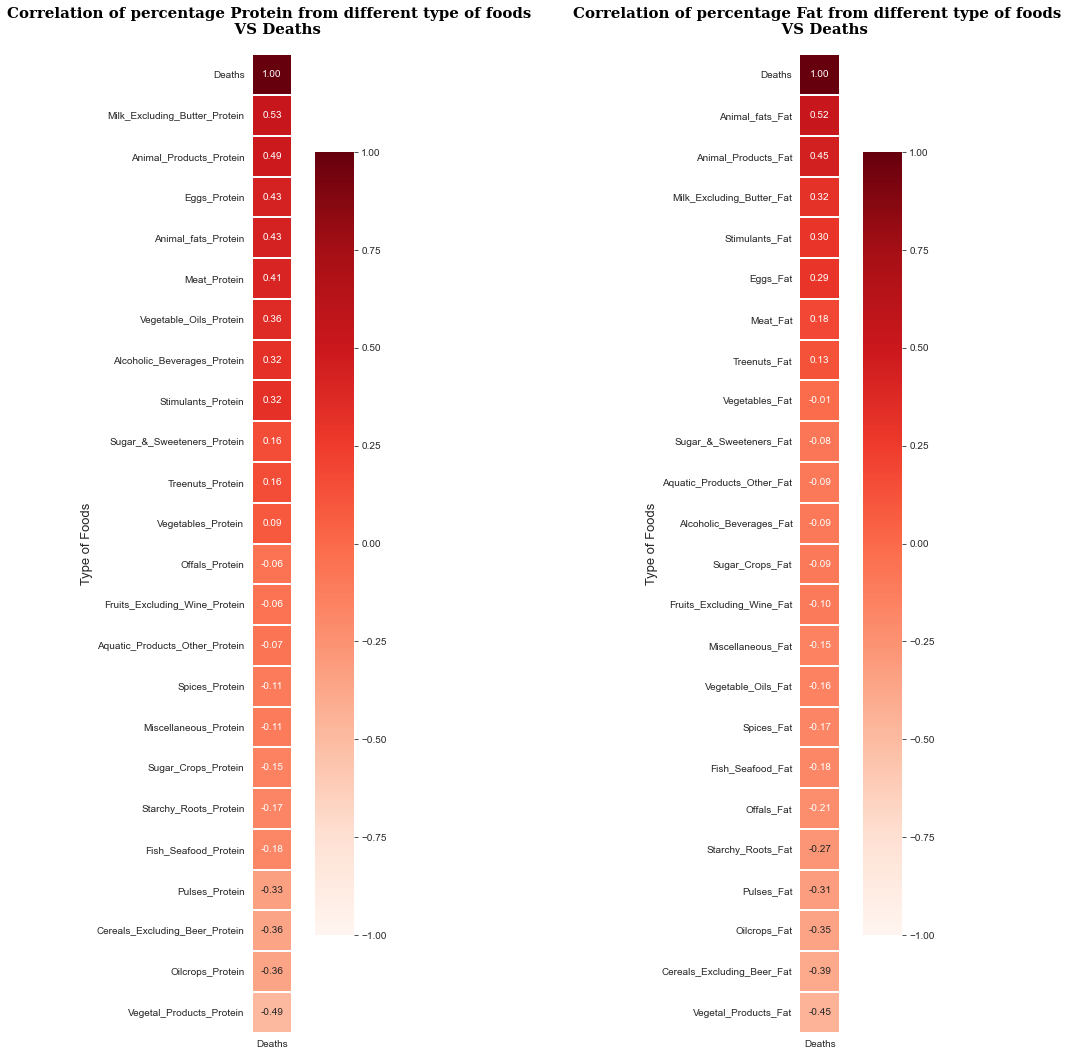

In [90]:
fig, ax = plt.subplots(1,2, figsize=(18,18))

plt.subplot(1,2,1)
corr_protein = Protein.corr()[['Deaths']].sort_values(by='Deaths', ascending=False)
ht1=sns.heatmap(corr_protein, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='Reds',linewidths = 1, square= True,
           cbar_kws={"shrink": .8})

ht1.set_title("Correlation of percentage Protein from different type of foods \n  VS Deaths",  fontdict={'color':'black', 'size':15, 'family':'serif','weight': 'bold'}, pad=20)
ht1.set_ylabel("Type of Foods", fontsize = 13)

plt.subplot(1,2,2)
corr_fat = Fat.corr()[['Deaths']].sort_values(by='Deaths', ascending=False)
ht2=sns.heatmap(corr_fat, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='Reds',linewidths = 1, square= True,
           cbar_kws={"shrink": .8})

ht2.set_title("Correlation of percentage Fat from different type of foods \n  VS Deaths",  fontdict={'color':'black', 'size':15, 'family':'serif','weight': 'bold'}, pad=20)
#ht2.set_xlabel("Deaths", fontsize = 13)
ht2.set_ylabel("Type of Foods", fontsize = 13)
#plt.show()

# Pair Plot Vegetable Proteins Vs Death/Recovered/Confirmed/Recoverd/Active and Population

In [91]:
cols = Project_Dataset.columns[12:22]
cols1= Project_Dataset.columns[25:30]
df1 = Project_Dataset[cols].copy(deep=True)
df1['Cereals_Excluding_Beer_Protein']=Project_Dataset['Cereals_Excluding_Beer_Protein']
df1['Fruits_Excluding_Wine_Protein']=Project_Dataset['Fruits_Excluding_Wine_Protein']
cols = df1.columns
df2= Project_Dataset[cols1].copy(deep=True)

Vegetable_Protein = pd.merge(df1,df2, on="Country")

Text(0.5, 1.09, 'Pair Plots showing Vegetable Proteins VS Death/Recovered/Confirmed/Recoverd/Active/Population')

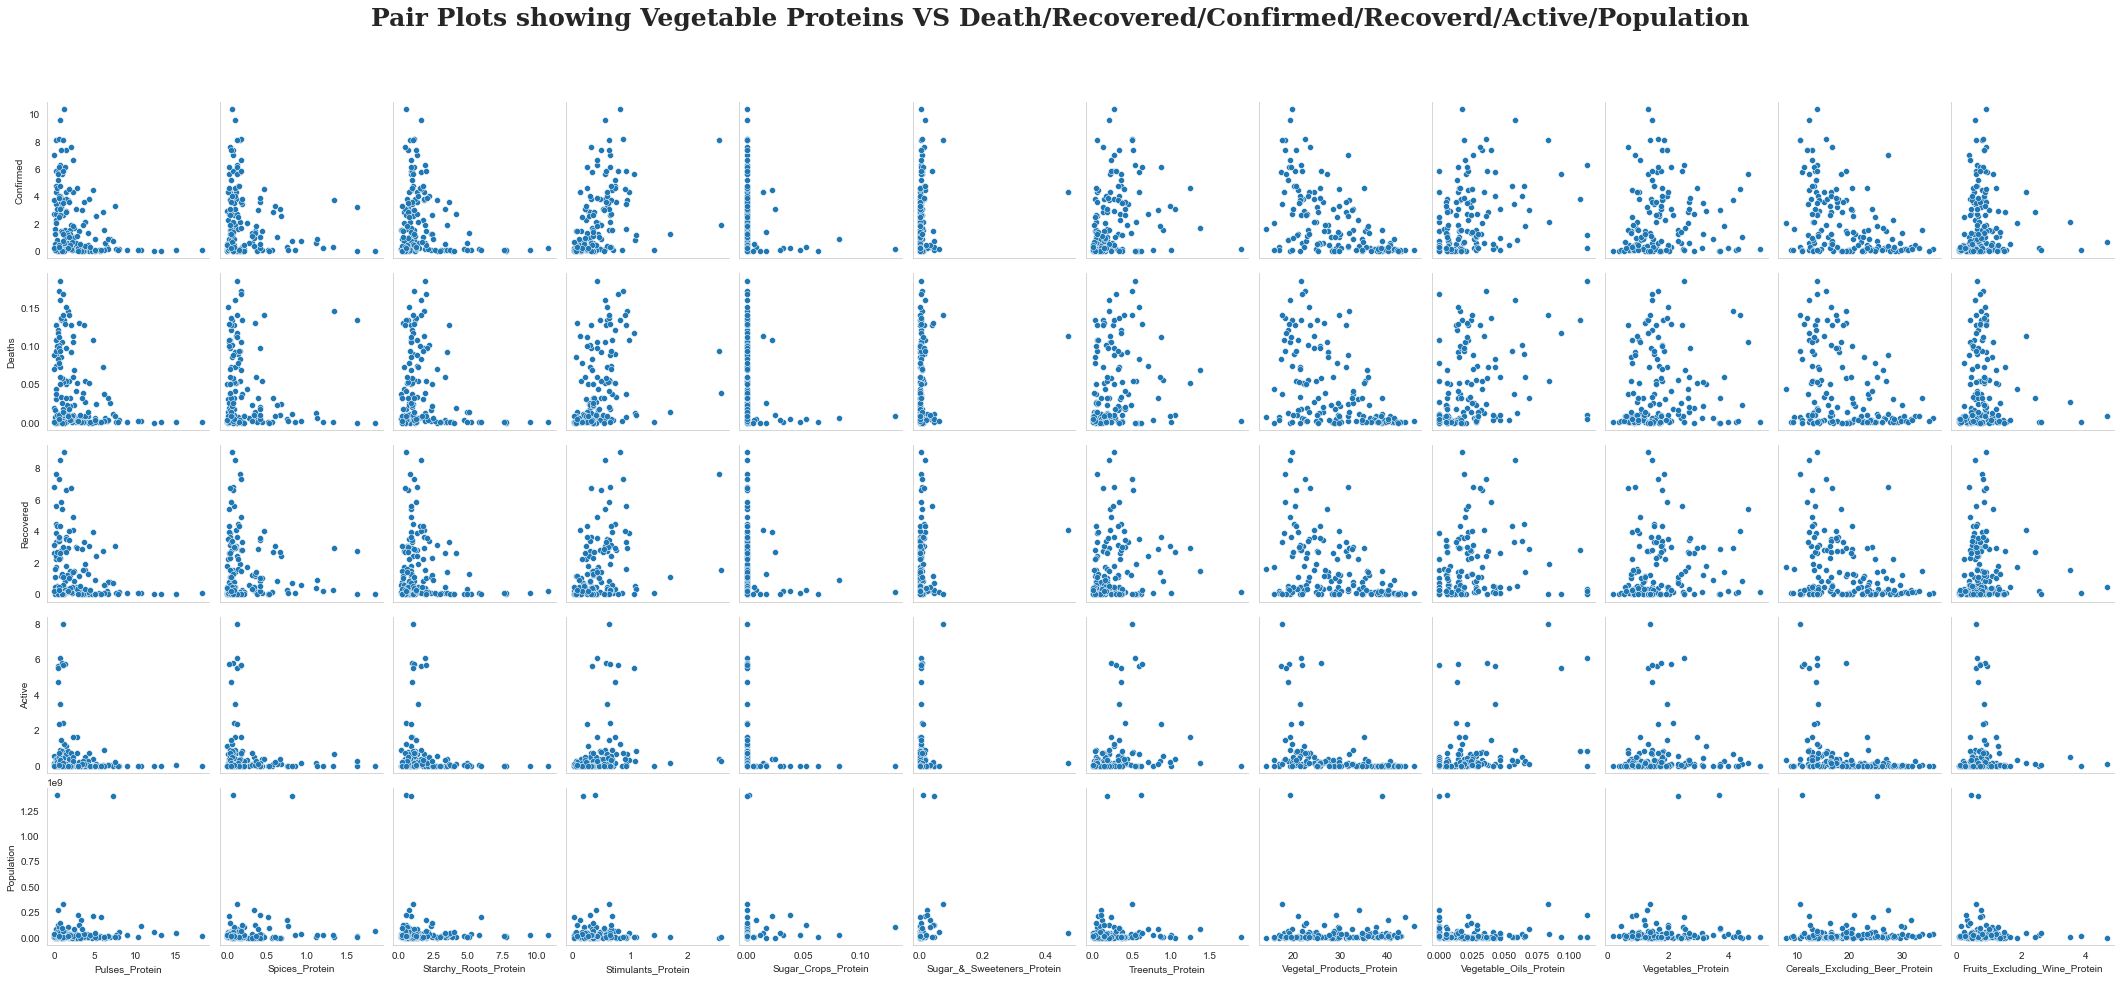

In [92]:
plot = sns.pairplot(Vegetable_Protein, x_vars=cols,y_vars=cols1)
plot.fig.suptitle("Pair Plots showing Vegetable Proteins VS Death/Recovered/Confirmed/Recoverd/Active/Population", y=1.09, 
                  fontsize=25,fontweight='bold', fontfamily='serif')

# Pair Plot Vegetable Fat Vs Death/Recovered/Confirmed/Recoverd/Active and Population

In [93]:
cols = Project_Dataset.columns[43:53]
cols1= Project_Dataset.columns[25:30]
df1 = Project_Dataset[cols].copy(deep=True)
df1['Cereals_Excluding_Beer_Protein']=Project_Dataset['Cereals_Excluding_Beer_Protein']
df1['Fruits_Excluding_Wine_Protein']=Project_Dataset['Fruits_Excluding_Wine_Protein']
cols = df1.columns
df2= Project_Dataset[cols1].copy(deep=True)

Vegetable_Fat = pd.merge(df1,df2, on="Country")

Text(0.5, 1.09, 'Pair Plots showing Vegetable Fats VS Death/Recovered/Confirmed/Recoverd/Active/Population')

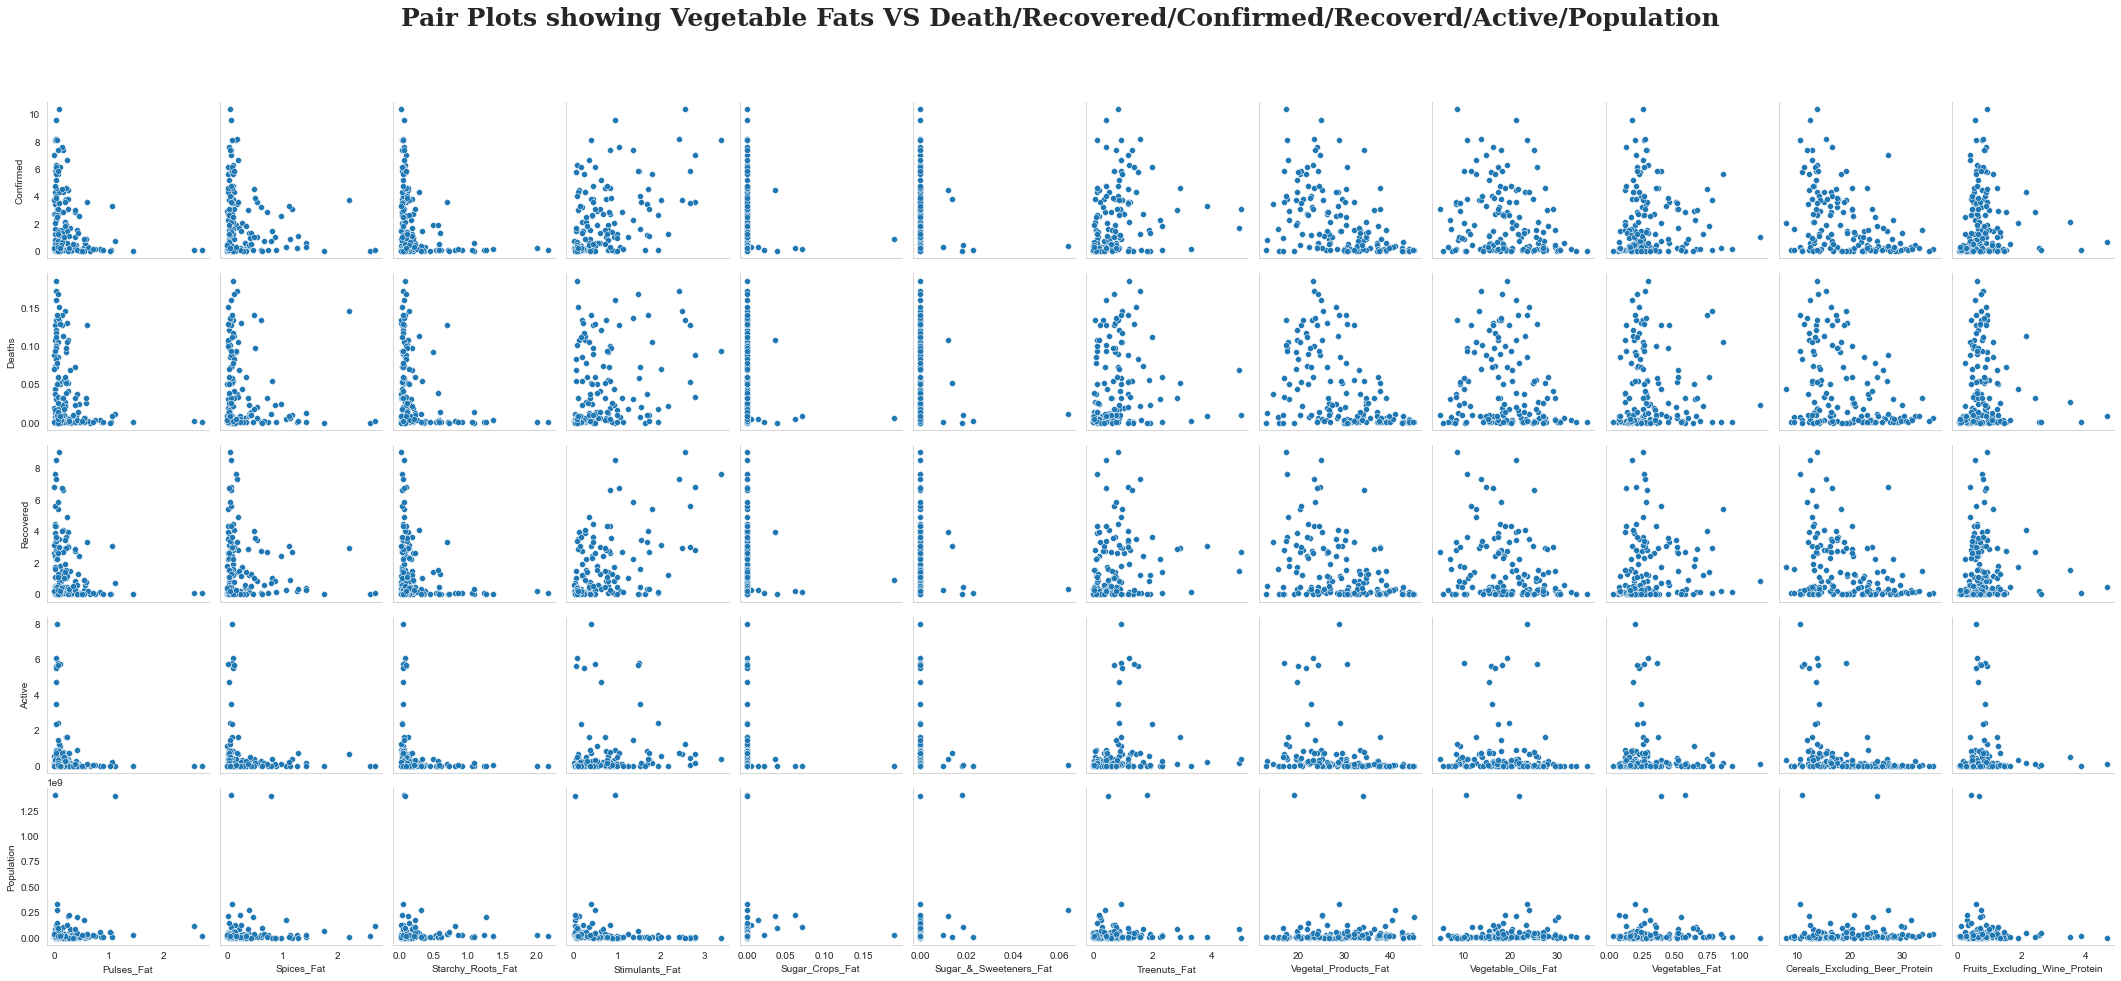

In [94]:
plot = sns.pairplot(Vegetable_Fat, x_vars=cols,y_vars=cols1)
plot.fig.suptitle("Pair Plots showing Vegetable Fats VS Death/Recovered/Confirmed/Recoverd/Active/Population", y=1.09, 
                  fontsize=25,fontweight='bold', fontfamily='serif')

# Pair Plot Animal Proteins Vs Death/Recovered/Confirmed/Recoverd/Active and Population

In [95]:
cols = Project_Dataset.columns[1:12]
cols1= Project_Dataset.columns[25:30]
df1 = Project_Dataset[cols].copy(deep=True)
df1['Cereals_Excluding_Beer_Protein']=Project_Dataset['Cereals_Excluding_Beer_Protein']
df1['Fruits_Excluding_Wine_Protein']=Project_Dataset['Fruits_Excluding_Wine_Protein']
cols = df1.columns
df2= Project_Dataset[cols1].copy(deep=True)

Animal_Protein = pd.merge(df1,df2, on="Country")

Text(0.5, 1.09, 'Pair Plots showing Animal Proteins VS Death/Recovered/Confirmed/Recoverd/Active/Population')

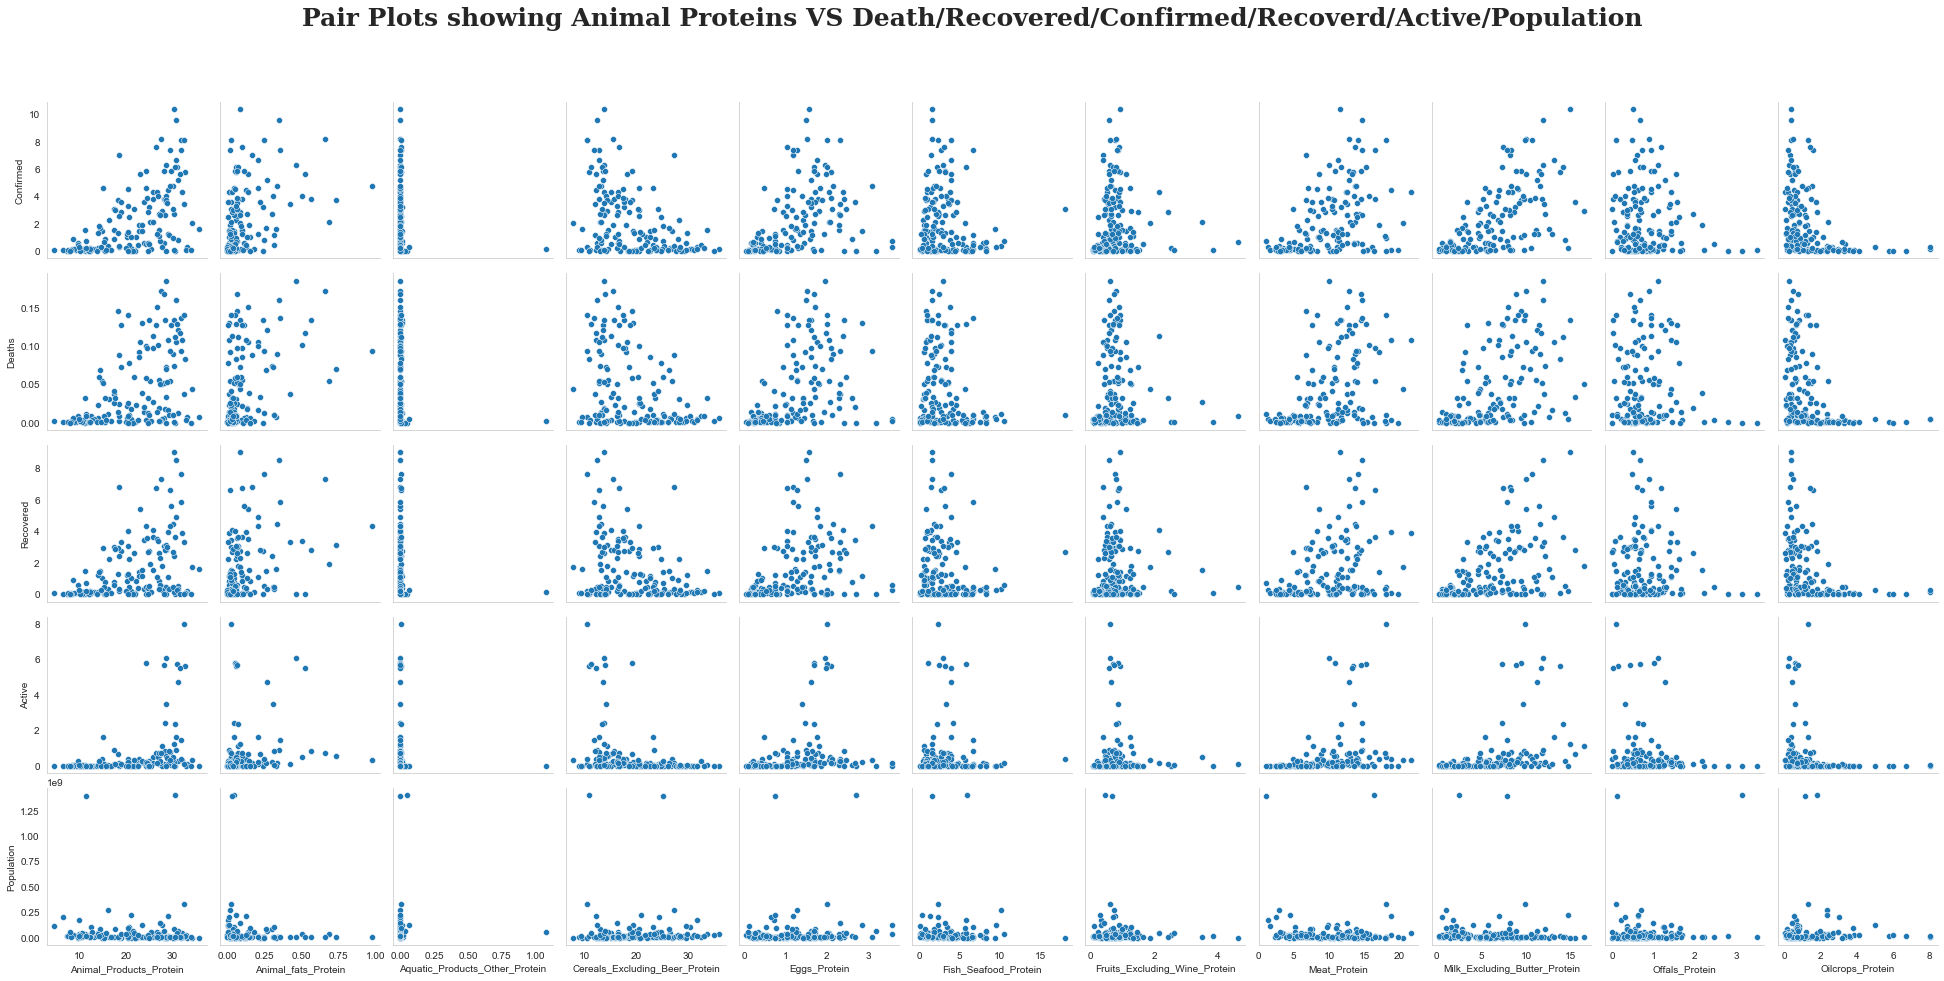

In [96]:
plot = sns.pairplot(Animal_Protein, x_vars=cols,y_vars=cols1)
plot.fig.suptitle("Pair Plots showing Animal Proteins VS Death/Recovered/Confirmed/Recoverd/Active/Population", y=1.09, 
                  fontsize=25,fontweight='bold', fontfamily='serif')

# Pair Plot Animal Fats Vs Death/Recovered/Confirmed/Recoverd/Active and Population

In [97]:
cols = Project_Dataset.columns[32:43]
cols1= Project_Dataset.columns[25:30]
df1 = Project_Dataset[cols].copy(deep=True)
df1['Cereals_Excluding_Beer_Protein']=Project_Dataset['Cereals_Excluding_Beer_Protein']
df1['Fruits_Excluding_Wine_Protein']=Project_Dataset['Fruits_Excluding_Wine_Protein']
cols = df1.columns
df2= Project_Dataset[cols1].copy(deep=True)

Animal_Fat = pd.merge(df1,df2, on="Country")

Text(0.5, 1.09, 'Pair Plots showing Animal Fats VS Death/Recovered/Confirmed/Recoverd/Active/Population')

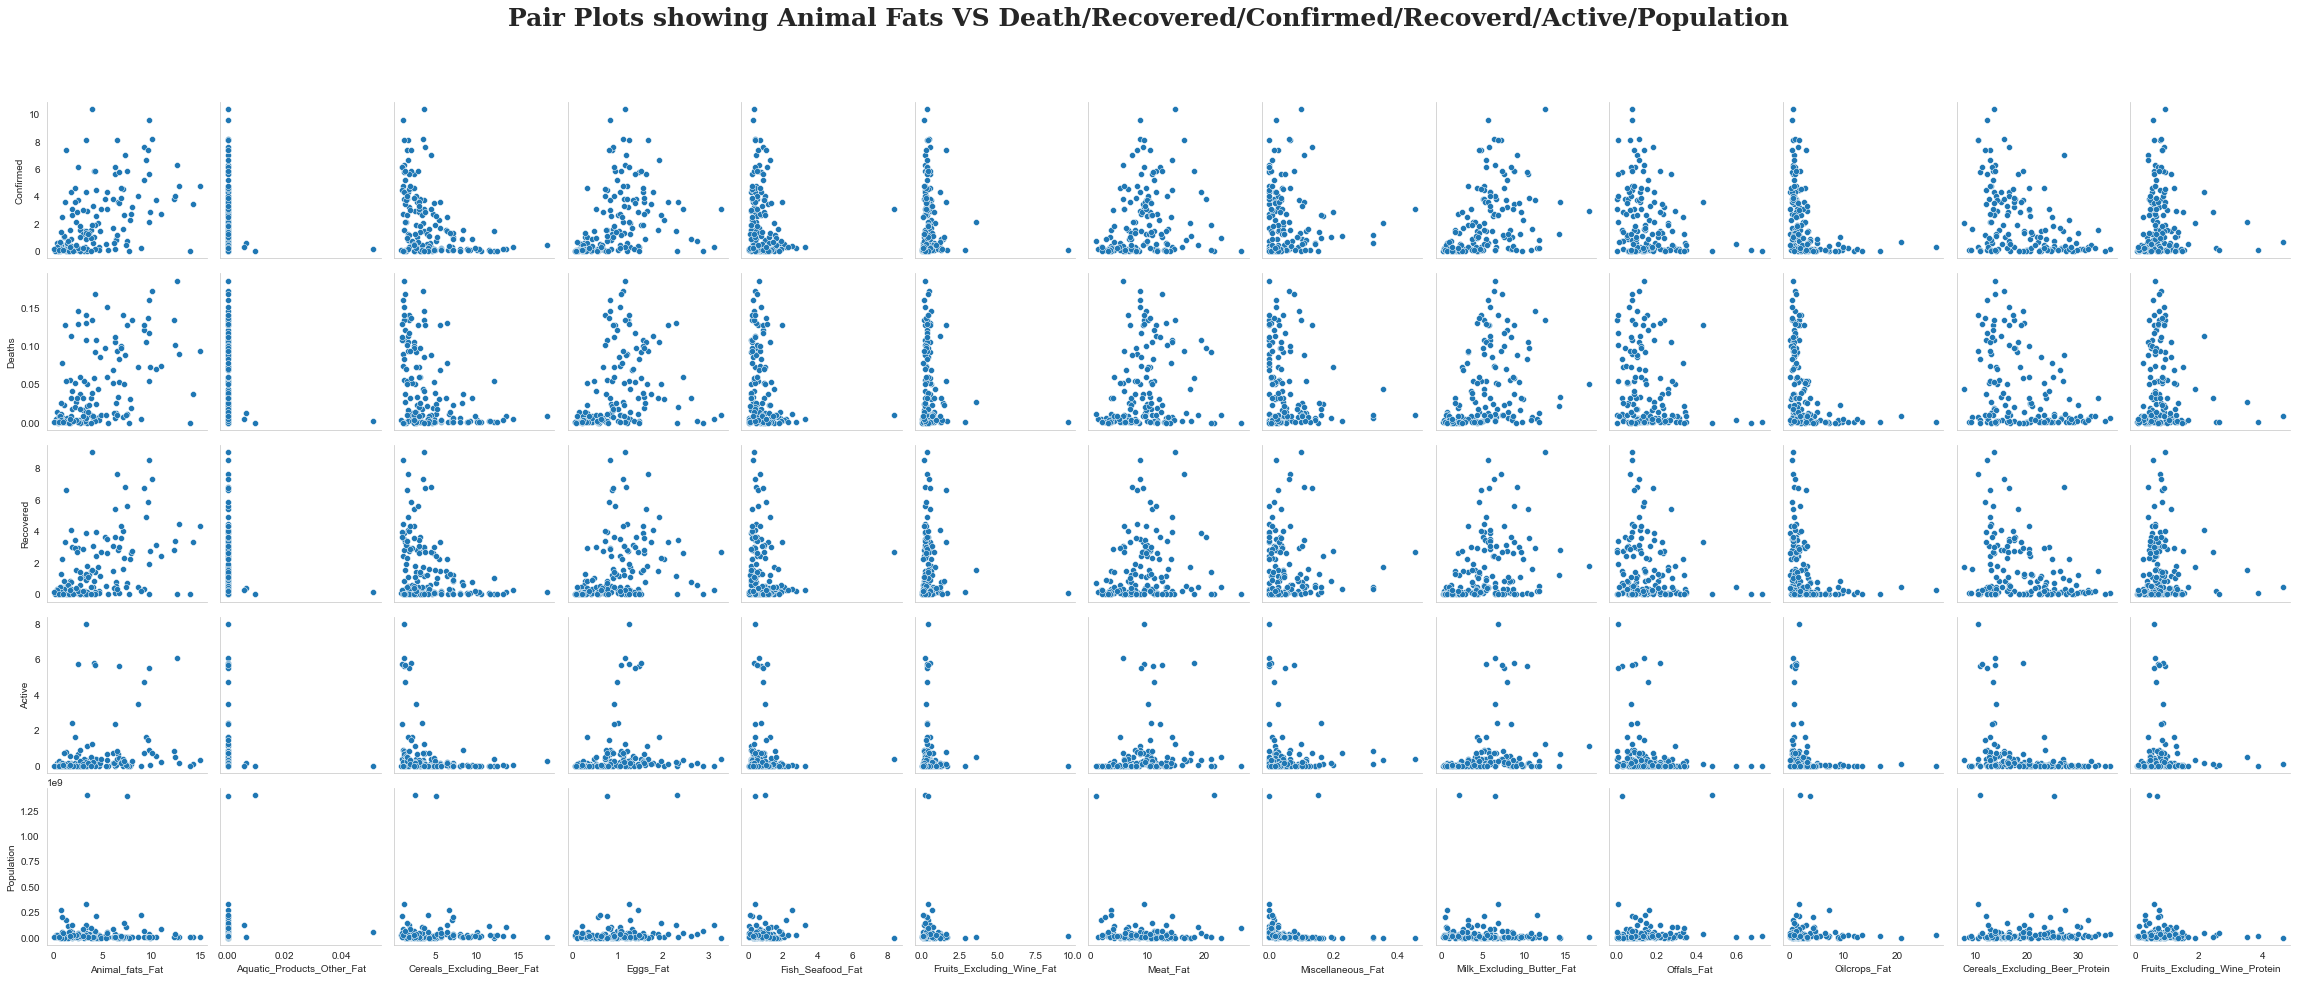

In [98]:
plot = sns.pairplot(Animal_Fat, x_vars=cols,y_vars=cols1)
plot.fig.suptitle("Pair Plots showing Animal Fats VS Death/Recovered/Confirmed/Recoverd/Active/Population", y=1.09, 
                  fontsize=25,fontweight='bold', fontfamily='serif')

## Regression Analysis

### From the Pair plot and heat map we have chosen the below food proteins and fats to do our Regression analysis:
#### (Milk_Excluding_Butter_Protein, Animal_Content_Protein, Animal_fats_Fat, Vegetal_Products_Protein, Vegetal_Products_Fats)

### Milk_Excluding_Butter_Protein vs Deaths Regression Line Calculation

[Text(0.5, 6.799999999999994, 'Milk_Excluding_Butter_Protein Percentage')]

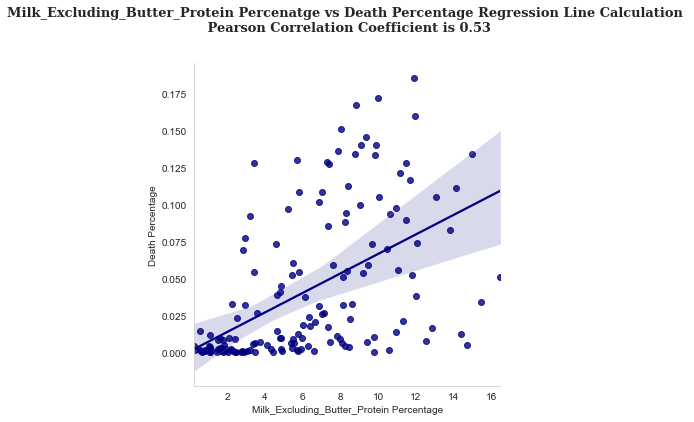

In [99]:
sns.lmplot(x='Milk_Excluding_Butter_Protein', y='Deaths', data=Project_Dataset, ci=99.99, line_kws={'color':'navy'}, scatter_kws={'color':'navy'})
ax = plt.gca()
#Pearson correlation coefficient (r)
correlation_milk_protein = round(Project_Dataset.Milk_Excluding_Butter_Protein.corr(Project_Dataset.Deaths),2)

ax.set_title('Milk_Excluding_Butter_Protein Percenatge vs Death Percentage Regression Line Calculation \n Pearson Correlation Coefficient is' + ' ' + str(correlation_milk_protein)
             ,y=1.08, fontsize=13,fontweight='bold', fontfamily='serif')

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Milk_Excluding_Butter_Protein Percentage')

#### Hypothesis Testing

In [100]:
p = stats.pearsonr(Project_Dataset.Milk_Excluding_Butter_Protein, Project_Dataset.Deaths)
p_value = p[1]
p_value

1.9014740560049127e-12

In [101]:
# Since the p-value is less than alpha, we can accept the alternate hypothesis that the slope of the regression line is not equal to 0

[Text(0.5, 0, 'Milk_Excluding_Butter_Protein Percentage')]

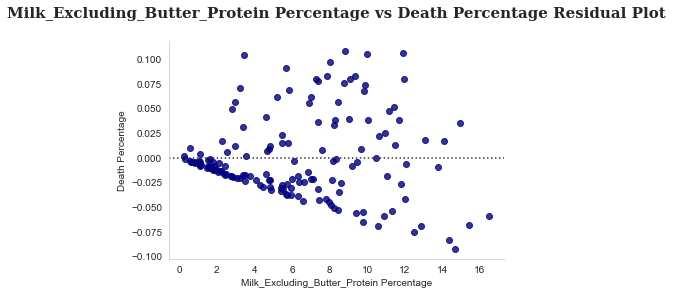

In [102]:
sns.residplot(x='Milk_Excluding_Butter_Protein', y='Deaths', data=Project_Dataset, line_kws={'color':'navy'}, scatter_kws={'color':'navy'})
ax = plt.gca()
ax.set_title("Milk_Excluding_Butter_Protein Percentage vs Death Percentage Residual Plot",y=1.08, fontsize=15,fontweight='bold', fontfamily='serif')
right = ax.spines['right']
top = ax.spines['top']
right.set_visible(False)
top.set_visible(False)

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Milk_Excluding_Butter_Protein Percentage')

In [103]:
Milk_Protein_b1 = correlation_milk_protein * Project_Dataset.Deaths.std()/Project_Dataset.Milk_Excluding_Butter_Protein.std()
Milk_Protein_b0 = Project_Dataset.Deaths.mean() - (Milk_Protein_b1*Project_Dataset.Milk_Excluding_Butter_Protein.mean())
print(Milk_Protein_b1)
print(Milk_Protein_b0)

0.006655401528110761
0.00029670509413231433


### y = 0.0067x+0.0003 
#### As the percentage of protein intake from milk products increases by 1, the death percentage increases by 0.0067

### Animal_Content_Protein vs Deaths Regression Line Calculation

In [104]:
Project_Dataset['Animal_Content_Protein'] = Project_Dataset.Animal_Products_Protein + Project_Dataset.Animal_fats_Protein + Project_Dataset.Aquatic_Products_Other_Protein + Project_Dataset.Fish_Seafood_Protein + Project_Dataset.Meat_Protein + Project_Dataset.Offals_Protein + Project_Dataset.Eggs_Protein + Project_Dataset.Milk_Excluding_Butter_Protein

[Text(0.5, 6.799999999999994, 'Animal_Content_Protein Percentage')]

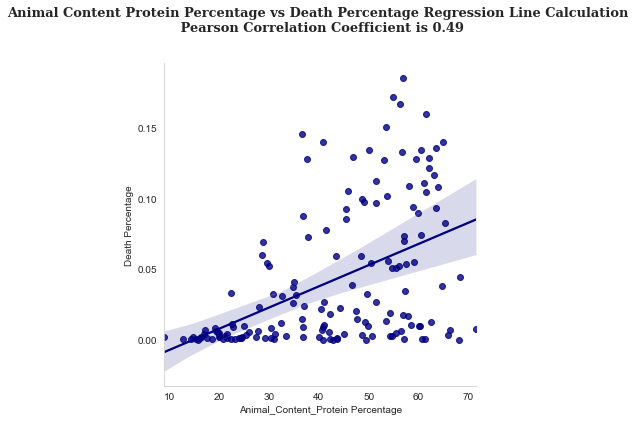

In [105]:
sns.lmplot(x='Animal_Content_Protein', y='Deaths', data = Project_Dataset, ci=99.99, line_kws={'color':'navy'}, scatter_kws={'color':'navy'})
ax = plt.gca()
correlation_animal_protein = round(Project_Dataset.Animal_Content_Protein.corr(Project_Dataset.Deaths),2)

ax.set_title('Animal Content Protein Percentage vs Death Percentage Regression Line Calculation \n Pearson Correlation Coefficient is' + ' ' + str(correlation_animal_protein),
             y=1.08, fontsize=13,fontweight='bold', fontfamily='serif')

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Animal_Content_Protein Percentage')

[Text(0.5, 0, 'Animal_Content_Protein Percentage')]

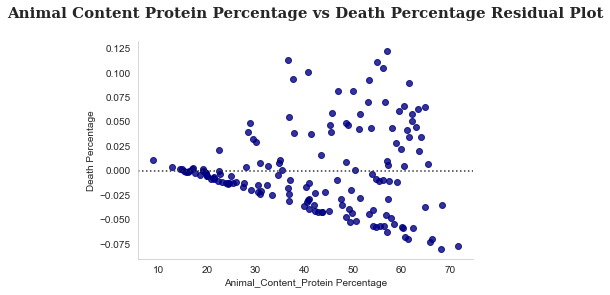

In [106]:
sns.residplot(x='Animal_Content_Protein', y='Deaths', data=Project_Dataset, line_kws={'color':'navy'}, scatter_kws={'color':'navy'})
ax = plt.gca()
ax.set_title("Animal Content Protein Percentage vs Death Percentage Residual Plot",y=1.08, fontsize=15,fontweight='bold', fontfamily='serif')
right = ax.spines['right']
top = ax.spines['top']
right.set_visible(False)
top.set_visible(False)

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Animal_Content_Protein Percentage')

In [107]:
Animal_Protein_b1 = correlation_animal_protein * Project_Dataset.Deaths.std()/Project_Dataset.Animal_Content_Protein.std()
Animal_Protein_b0 = Project_Dataset.Deaths.mean() - (Animal_Protein_b1*Project_Dataset.Animal_Content_Protein.mean())
print(Animal_Protein_b1)
print(Animal_Protein_b0)

0.0015147110430449604
-0.022727404822619146


### y = 0.0015x - 0.023 
#### As the percentage of protein intake from animal products increases by 1, the death percentage increases by 0.0015

### Animal_Fats vs Deaths Regression Line Calculation

[Text(0.5, 6.799999999999994, 'Animal Fats Percentage')]

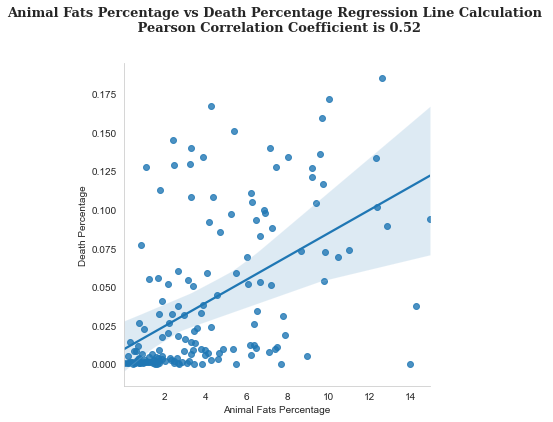

In [108]:
sns.lmplot(x='Animal_fats_Fat', y='Deaths', data=Project_Dataset, ci=99.99)
ax = plt.gca()
correlation_animalfats_Fat = round(Project_Dataset.Animal_fats_Fat.corr(Project_Dataset.Deaths) ,2)

ax.set_title('Animal Fats Percentage vs Death Percentage Regression Line Calculation \n Pearson Correlation Coefficient is' + ' ' + str(correlation_animalfats_Fat),
             y=1.08, fontsize=13,fontweight='bold', fontfamily='serif')

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Animal Fats Percentage')

[Text(0.5, 0, 'Animal Fats Percentage')]

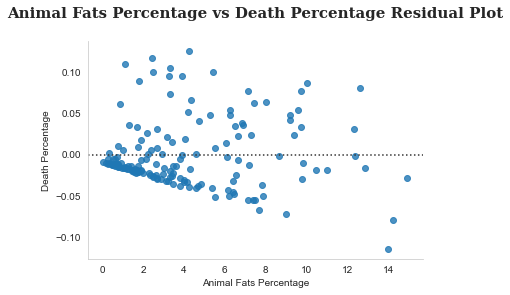

In [109]:
sns.residplot(x='Animal_fats_Fat', y='Deaths', data=Project_Dataset)
ax = plt.gca()
ax.set_title("Animal Fats Percentage vs Death Percentage Residual Plot",y=1.08, fontsize=15,fontweight='bold', fontfamily='serif')
right = ax.spines['right']
top = ax.spines['top']
right.set_visible(False)
top.set_visible(False)

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Animal Fats Percentage')

In [110]:
Animalfats_Fat_b1 = correlation_animalfats_Fat * Project_Dataset.Deaths.std()/Project_Dataset.Animal_fats_Fat.std()
Animalfats_Fat_b0 = Project_Dataset.Deaths.mean() - (Animalfats_Fat_b1*Project_Dataset.Animal_fats_Fat.mean())
print(Animalfats_Fat_b1)
print(Animalfats_Fat_b0)

0.007560638178024379
0.009434106330220446


### y = 0.0075x+0.009
#### As the percentage of fat intake from animal fats increases by 1, the death percentage increases by 0.0076

### Vegetal_Products_Protein vs Deaths Regression Line Calculation

[Text(0.5, 6.799999999999994, 'Vegetal Products Percentage')]

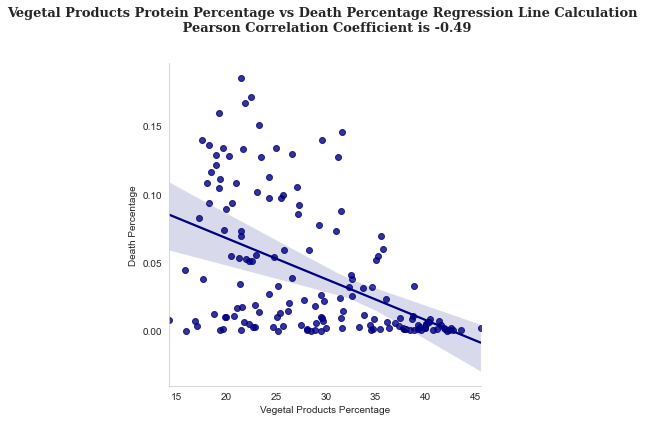

In [111]:
sns.lmplot(x='Vegetal_Products_Protein', y='Deaths', ci=99.99, data = Project_Dataset, line_kws={'color':'navy'}, scatter_kws={'color':'navy'})
ax = plt.gca()
correlation_vegetal_protein = round(Project_Dataset.Vegetal_Products_Protein.corr(Project_Dataset.Deaths),2)

ax.set_title('Vegetal Products Protein Percentage vs Death Percentage Regression Line Calculation \n Pearson Correlation Coefficient is' + ' ' + str(correlation_vegetal_protein),
             y=1.08, fontsize=13,fontweight='bold', fontfamily='serif')

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Vegetal Products Percentage')

#### Hypothesis Testing

In [112]:
p = stats.pearsonr(Project_Dataset.Vegetal_Products_Protein, Project_Dataset.Deaths)
p_value = p[1]
p_value

1.3859570422924304e-10

In [113]:
# Since the p-value is less than alpha, we can accept the alternate hypothesis that the slope of the regression line is not equal to 0

[Text(0.5, 0, 'Vegetal Products Percentage')]

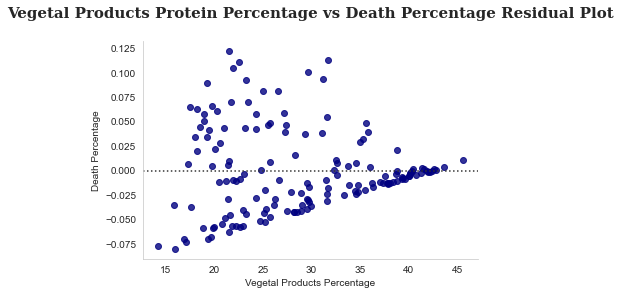

In [114]:
sns.residplot(x='Vegetal_Products_Protein', y='Deaths', data = Project_Dataset, line_kws={'color':'navy'}, scatter_kws={'color':'navy'})
ax = plt.gca()
ax.set_title("Vegetal Products Protein Percentage vs Death Percentage Residual Plot",y=1.08, fontsize=15,fontweight='bold', fontfamily='serif')
right = ax.spines['right']
top = ax.spines['top']
right.set_visible(False)
top.set_visible(False)

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Vegetal Products Percentage')

In [115]:
Vegetal_Protein_b1 = correlation_vegetal_protein * Project_Dataset.Deaths.std()/Project_Dataset.Vegetal_Products_Protein.std()
Vegetal_Protein_b0 = Project_Dataset.Deaths.mean() - (Vegetal_Protein_b1*Project_Dataset.Vegetal_Products_Protein.mean())
print(Vegetal_Protein_b1)
print(Vegetal_Protein_b0)

-0.0030292276303747934
0.12873942043870307


### y = -0.003x+0.129
#### As the percentage of protein intake from vegetal products increases by 1, the death percentage decreases by 0.003

#### Vegetal_Products_Fat vs Deaths Regression Line Calculation

[Text(0.5, 6.799999999999994, 'Vegetal Products Fats Percentage')]

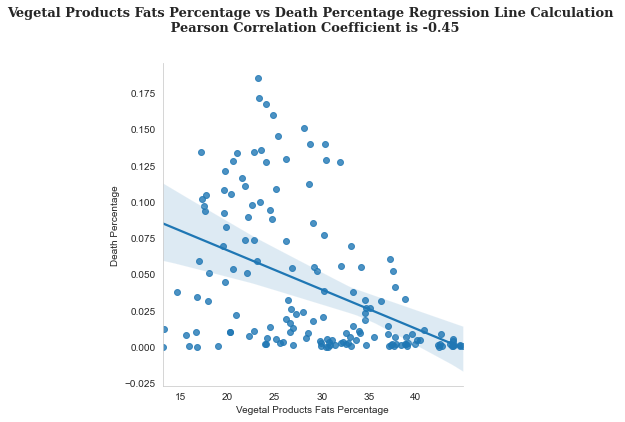

In [116]:
sns.lmplot(x='Vegetal_Products_Fat', y='Deaths', data = Project_Dataset, ci=99.99)
ax = plt.gca()
correlation_vegetal_fat = round(Project_Dataset.Vegetal_Products_Fat.corr(Project_Dataset.Deaths),2)

ax.set_title('Vegetal Products Fats Percentage vs Death Percentage Regression Line Calculation \n Pearson Correlation Coefficient is' + ' ' + str(correlation_vegetal_fat),
             y=1.08, fontsize=13,fontweight='bold', fontfamily='serif')

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Vegetal Products Fats Percentage')

[Text(0.5, 0, 'Vegetal Products Fats Percentage')]

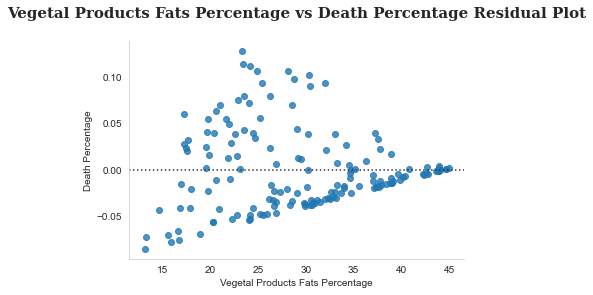

In [117]:
sns.residplot(x='Vegetal_Products_Fat', y='Deaths', data = Project_Dataset)
ax = plt.gca()
ax.set_title("Vegetal Products Fats Percentage vs Death Percentage Residual Plot",y=1.08, fontsize=15,fontweight='bold', fontfamily='serif')
right = ax.spines['right']
top = ax.spines['top']
right.set_visible(False)
top.set_visible(False)

ax.set(ylabel='Death Percentage')
ax.set(xlabel='Vegetal Products Fats Percentage')

In [118]:
Vegetal_Fat_b1 = correlation_vegetal_fat * Project_Dataset.Deaths.std()/Project_Dataset.Vegetal_Products_Fat.std()
Vegetal_Fat_b0 = Project_Dataset.Deaths.mean() - (Vegetal_Fat_b1*Project_Dataset.Vegetal_Products_Fat.mean())
print(Vegetal_Fat_b1)
print(Vegetal_Fat_b0)

-0.002712052042394756
0.12083446879077524


### y = -0.002x+0.120
#### As the percentage of fat intake from vegetal products increases by 1, the death percentage decreases by 0.002

### Machine Learning - Multiple Regression

#### Used Linear Regression Model from sklearn library to analyze the correlation between dependent variable death percentage and multiple independent variables food products.

In [119]:
X = Project_Dataset.loc[:, [
    #'Animal_fats_Fat', 'Eggs_Protein', 'Milk_Excluding_Butter_Protein', 'Vegetal_Products_Fat']]
     'Animal_fats_Protein', 'Eggs_Protein', 'Milk_Excluding_Butter_Fat', 'Vegetal_Products_Fat']] #(combination with best R^2 value)
Y = Project_Dataset.Deaths

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(X_train, Y_train)

LinearRegression()

In [121]:
print(regr.intercept_)

0.023934892140218083


In [122]:
print(regr.coef_)
fea_imp = [(n,c) for n,c in zip(X, regr.coef_) if c != 0]
df = pd.DataFrame(fea_imp, columns=['Features Name', 'Coefficient']).sort_values(by = 'Coefficient', ascending=False)
df

[ 0.07264005  0.01389758  0.00277002 -0.00075066]


,Features Name,Coefficient
0,Animal_fats_Protein,0.07
1,Eggs_Protein,0.01
2,Milk_Excluding_Butter_Fat,0.00
3,Vegetal_Products_Fat,-0.00


In [123]:
Y_pred = regr.predict(X_test)
from sklearn.metrics import r2_score

bold_start = '\033[1m'
bold_end   = '\033[0m'
print(bold_start,'R^2 value: %.2f' % r2_score(Y_test, Y_pred),bold_end)

 R^2 value: 0.42 


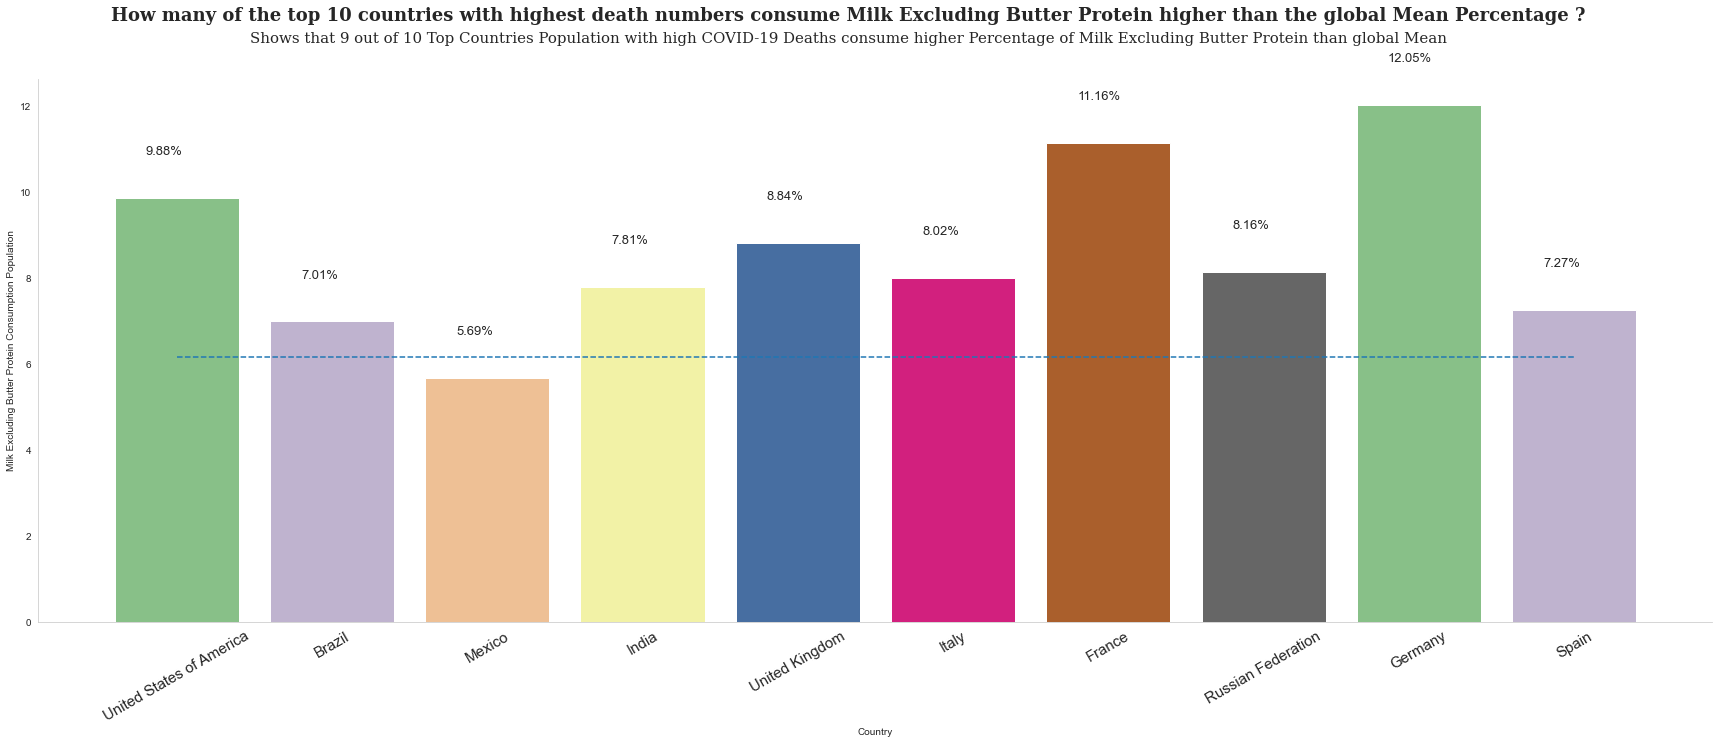

In [124]:
Project_Dataset_Country['Milk_Excluding_Butter_Protein_Global_Mean'] = Project_Dataset_Country.Milk_Excluding_Butter_Protein.mean()

fig, ax = plt.subplots(1,1, figsize=(30,10))
graph = sns.barplot(data = Project_Dataset_Country.sort_values(by='Death_Cases', ascending=False).head(10)
            ,x = 'Country'
            ,y = 'Milk_Excluding_Butter_Protein'
            ,ax=ax, palette='Accent',dodge=False
            )

ln=sns.lineplot(data=Project_Dataset_Country.sort_values(by='Death_Cases', ascending=False).head(10), 
                x="Country", 
                y="Milk_Excluding_Butter_Protein_Global_Mean",ax=ax)
ln.lines[-1].set_linestyle("--")

sns.despine(left=True)
plt.text(x=0.5, y=0.96, s="How many of the top 10 countries with highest death numbers consume Milk Excluding Butter Protein higher than the global Mean Percentage ?", fontsize=18, ha="center", transform=fig.transFigure,fontweight='bold', fontfamily='serif')
plt.text(x=0.5, y=0.93, s= "Shows that 9 out of 10 Top Countries Population with high COVID-19 Deaths consume higher Percentage of Milk Excluding Butter Protein than global Mean", fontsize=15, ha="center", transform=fig.transFigure,
        fontweight='normal', fontfamily='serif')

plt.ylabel('Milk Excluding Butter Protein Consumption Population')
plt.xticks(fontsize=15,rotation=30)

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    #print(x)
    val = float(Project_Dataset_Country.Milk_Excluding_Butter_Protein[Project_Dataset_Country.Country==x].tolist()[0])
    plt.text(i-0.2, 1+val, str(round(val,2))+'%', fontsize=13, rotation=0)
    
left = ax.spines['left']
left.set_visible(True)